Phân tích các yếu tố ảnh hưởng doanh thu toàn cầu của phim chiếu rạp (giai đoạn 2010-2020)

Nguồn: https://www.imdb.com/

| Tên thành viên | MSSV |
| --- | --- |
|Bùi Anh Khôi|19520649|
|Nguyễn Thị Thu Hà|19521456|
|Nguyễn Đình Quốc Bảo|19520402|

Import thư viện

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
from matplotlib import cm
from ipywidgets import *
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

Hàm

In [2]:
def getList(feature):
    gs = df[feature]

    gs.dropna(inplace=True)

    gList = ''

    for g in gs:
        gList = gList + g

    gList = list(set(gList.split(',')))
    try:
        gList.remove('')
    except:
        pass
    return gList

def year_to_str(year):
    if year!=None and str(year)!='nan':
        return str(year)
    else:
        return None

Đọc dữ liệu đã được làm sạch

In [3]:
df = pd.read_csv('./data/data_preprocessed.csv')

# Thông tin sơ lược bộ dữ liệu sau khi xử lý

Thông tin

| STT | Tên thuộc tính | Mô tả | Kiểu |
| --- | --- | --- | --- |
|0|title|Tiêu đề phim|phân loại|
|1|casts|Diễn viên|phân loại|
|2|directors|Đạo diễn|phân loại|
|3|writers|Biên kịch|phân loại|
|4|genres|Các tổ hợp thể loại|phân loại|
|5|certificate|Chứng chỉ phân loại độ tuổi|phân loại|
|6|release_date|Thời điểm ra mắt (năm)|số|
|7|countries_of_origin|Quốc gia xuất sứ|phân loại|
|8|languages|Ngôn ngữ hỗ trợ|phân loại|
|9|production_companies|Hãng sản suất|phân loại|
|10|gross_worldwide|Doanh thu toàn cầu (đô la Mỹ)|số|
|11|budget|Kinh phí sản suất ước tính (đô la Mỹ)|số|
|12|runtime|Thời lượng phim (phút)|số|
|13|color|Màu phim|phân loại|
|14|sound_mix|Công nghệ âm thanh sử dụng trong phim|phân loại|
|15|aspect_ratio|Tỷ lệ khung hình|phân loại|
|16|score|Điểm đánh giá (trên thang 10)|số|
|17|votes|Số lượng người tham gia đánh giá|số|
|18|user_reviews|Số lượng bình luận của người dùng|số|
|19|critic_reviews|Số lượng bình luận của nhà phê bình|số|
|20|metascore|Điểm đánh giá của nhà phê bình|số|

Kiểu dữ liệu

In [4]:
df.dtypes

title                    object
casts                    object
directors                object
writers                  object
genres                   object
certificate              object
release_date            float64
countries_of_origin      object
languages                object
production_companies     object
gross_worldwide         float64
budget                  float64
runtime                 float64
color                    object
sound_mix                object
aspect_ratio             object
score                   float64
votes                   float64
user_reviews            float64
critic_reviews          float64
metascore               float64
dtype: object

Mô tả thống kê

In [5]:
df.describe()

,release_date,gross_worldwide,budget,runtime,score,votes,user_reviews,critic_reviews,metascore
count,22165.000000,2.224500e+04,6.292000e+03,19985.00000,20294.000000,22245.000000,22245.000000,22245.000000,5171.000000
mean,2015.450034,1.582416e+07,1.703714e+07,103.77373,5.920006,14.290153,61.608092,37.784176,56.295301
std,3.046902,8.347394e+07,3.535144e+07,20.40872,1.141452,65.826653,264.532930,86.703250,17.166305
min,2010.000000,2.000000e+00,2.591644e-03,45.00000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2013.000000,3.640200e+04,1.160000e+06,90.00000,5.300000,0.103000,1.000000,0.000000,44.000000
50%,2016.000000,3.589280e+05,4.200000e+06,100.00000,6.100000,0.545000,4.000000,5.000000,57.000000
75%,2018.000000,3.059544e+06,1.500000e+07,113.00000,6.700000,3.100000,24.000000,28.000000,69.000000
max,2021.000000,2.797501e+09,3.560000e+08,808.00000,9.400000,2200.000000,11100.000000,1000.000000,100.000000


Số lượng dữ liệu bị khuyết trên từng thuộc tính

In [6]:
df.isnull().sum()

title                       0
casts                    1746
directors                1705
writers                  2573
genres                   1774
certificate             13360
release_date               80
countries_of_origin      1186
languages                1378
production_companies     3352
gross_worldwide             0
budget                  15953
runtime                  2260
color                    2072
sound_mix               15911
aspect_ratio            10799
score                    1951
votes                       0
user_reviews                0
critic_reviews              0
metascore               17074
dtype: int64

Phần trăm dữ liệu bị khuyết

In [7]:
df.isnull().mean() * 100

title                    0.000000
casts                    7.848955
directors                7.664644
writers                 11.566644
genres                   7.974826
certificate             60.058440
release_date             0.359631
countries_of_origin      5.331535
languages                6.194650
production_companies    15.068555
gross_worldwide          0.000000
budget                  71.714992
runtime                 10.159586
color                    9.314453
sound_mix               71.526186
aspect_ratio            48.545741
score                    8.770510
votes                    0.000000
user_reviews             0.000000
critic_reviews           0.000000
metascore               76.754327
dtype: float64

- Feature certificate, budget, metascore, aspect_ratio, sound_mix có tỷ lệ missing value khá lớn
- Feature votes - user_reviews - critic_reviews các missing value đã được điền khuyết với giá trị 0 (tương ứng với không có vote hoặc review)

# Basic EDA & Visualization


## Đơn biến

### Biến phân loại

#### Release Date

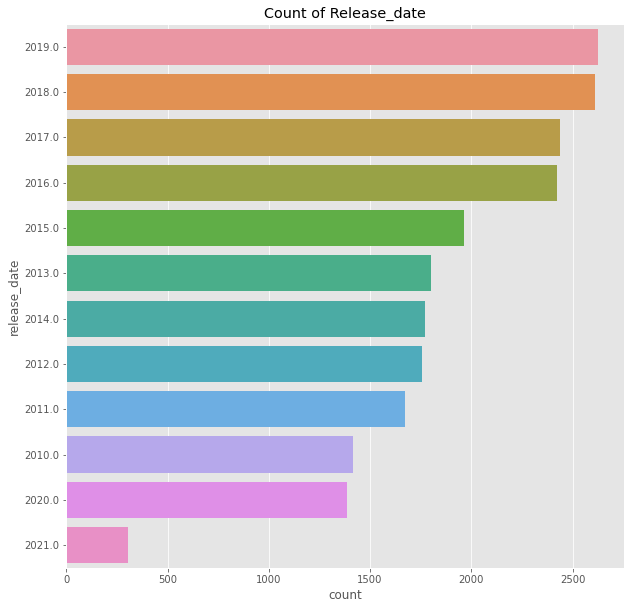

In [58]:
plt.figure(figsize=(10, 10))
sns.countplot(y="release_date",data=df, order=df.release_date.value_counts().index[0:20])
plt.title('Count of Release_date') 
plt.savefig('./graphs/don_bien/phan_loai/release_date_count' , bbox_inches='tight')
plt.show()

Nhận xét

- Số lượng phim tăng dần từ nằm 2010 - 2019
- Năm 2020 số lượng phim giảm mạnh có thể là do đại dịch

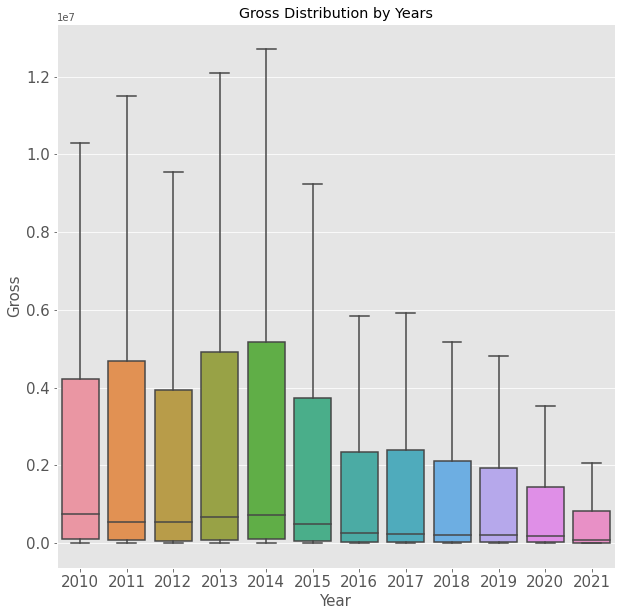

In [8]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=df["gross_worldwide"], x=df["release_date"],
            showfliers=False, order=[x for x in range(2010, 2022)])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Gross', fontsize=15) 
plt.title('Gross Distribution by Years')
plt.savefig('./graphs/don_bien/phan_loai/gross_by_year', bbox_inches='tight')
plt.show()

Doanh thu trong khoảng thời gian [2010,2015] có sự phân bố khá là tương đồng và có sự giao động lớn.
Doanh thu trong khoảng thời gian [2016,2020] có sự phân bố khá là tương đồng và có xu hướng thấp hơn và ít giao động doanh thu của nhóm [2010,2015]. (Có thể là do giai đoạn này công nghệ đã phát triển, internet có khắp mọi nơi nên người xem không cần phải lên rạp mà có thể chờ có trên internet rồi coi để giảm chi phí nên doanh thu thấp hơn so với giai đoạn trước).

#### Aspect Ratio

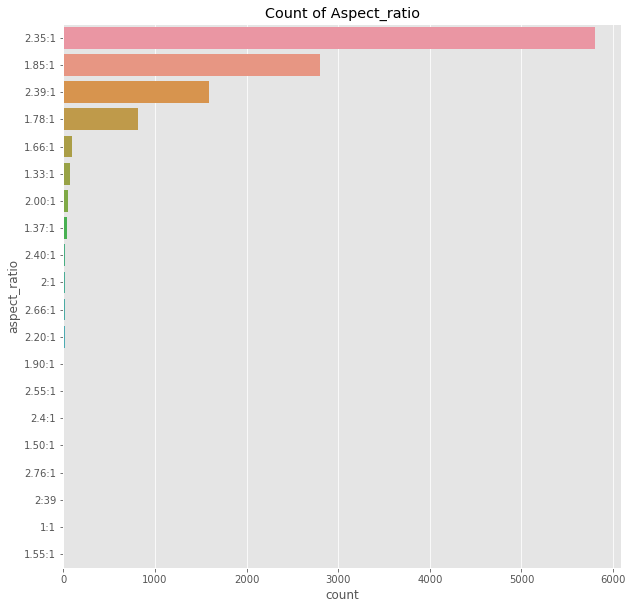

In [57]:
plt.figure(figsize=(10, 10))
sns.countplot(y="aspect_ratio",data=df, order=df.aspect_ratio.value_counts().index[0:20])
plt.title('Count of Aspect_ratio')
plt.savefig('./graphs/don_bien/phan_loai/aspect_ratio_count' , bbox_inches='tight')
plt.show()

Tỉ lệ khung hình phổ biến nhất là 2.35:1

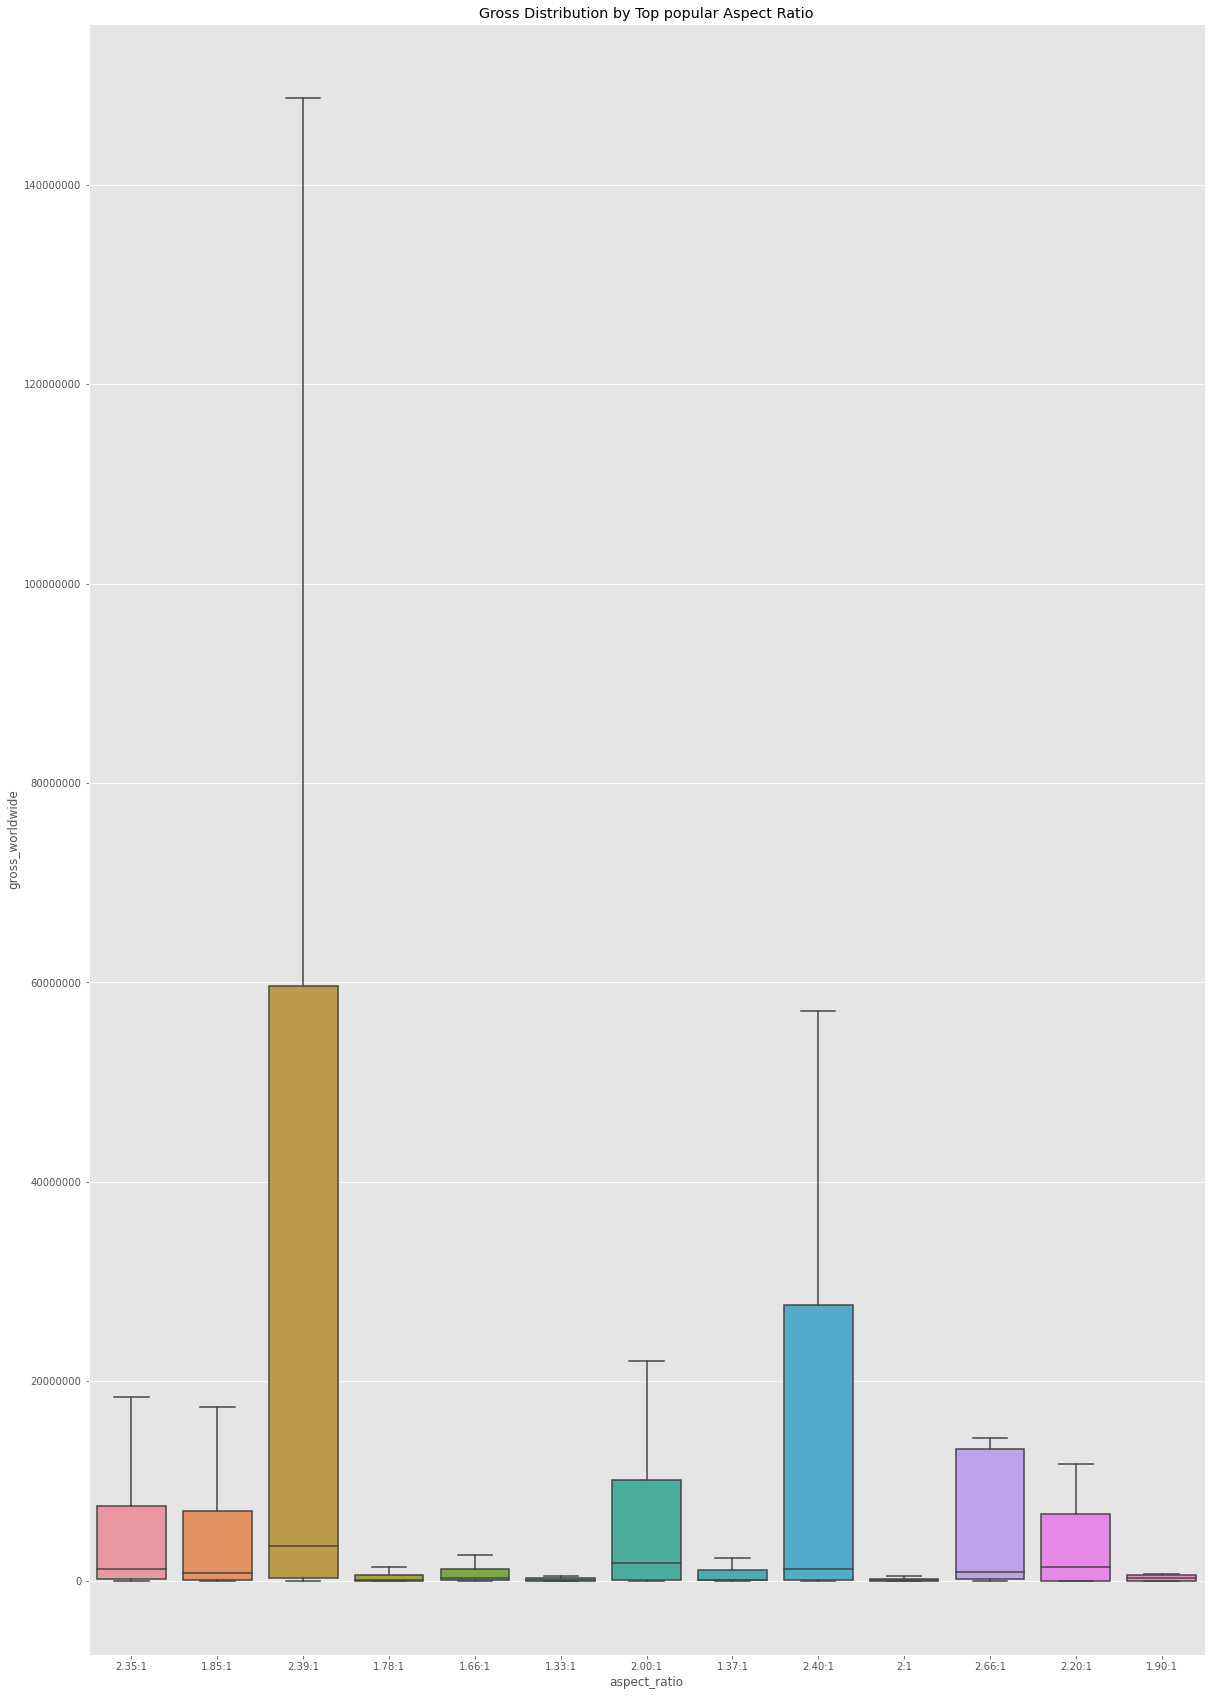

In [9]:
fig_dims = (20, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=df["gross_worldwide"], x=df["aspect_ratio"],showfliers=False, order=df.aspect_ratio.value_counts().index[0:13])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Gross Distribution by Top popular Aspect Ratio')
plt.savefig('./graphs/don_bien/phan_loai/gross_by_ar', bbox_inches='tight')
plt.show()

#### Directors

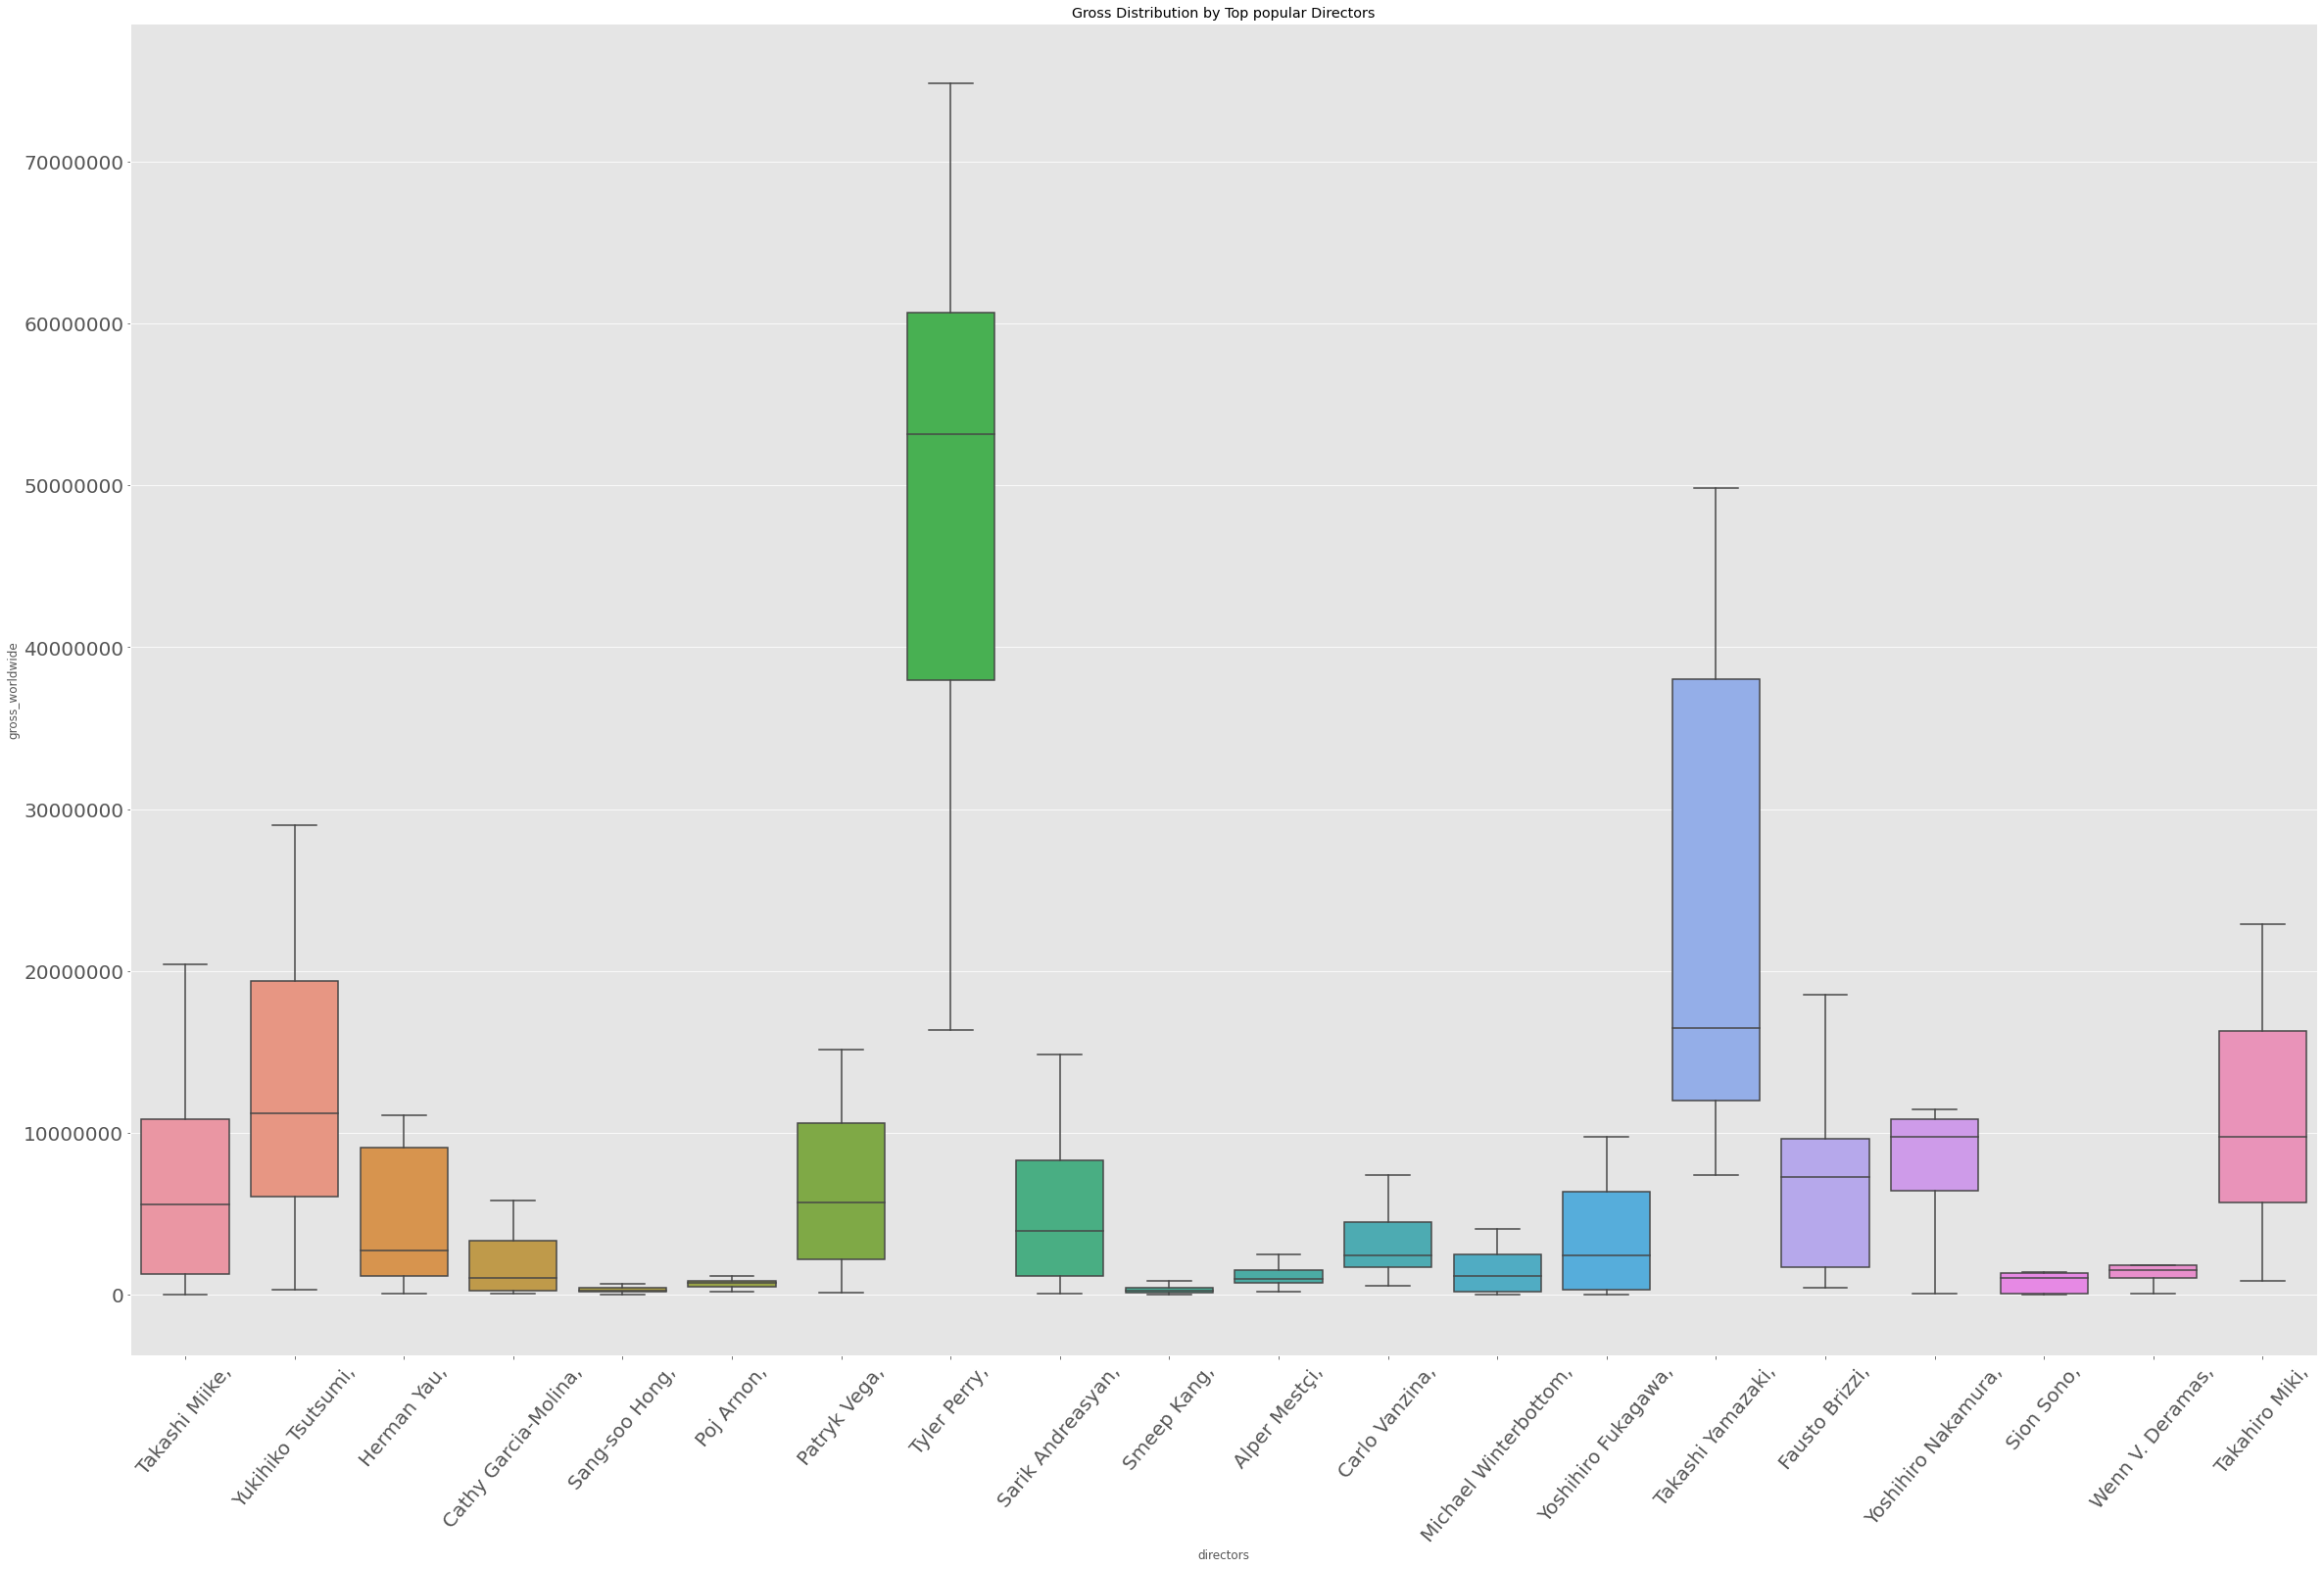

In [10]:
fig_dims = (40, 25)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=df["gross_worldwide"], x=df["directors"],showfliers=False, order=df.directors.value_counts().index[0:20])
plt.xticks(fontsize=20)
plt.xticks(rotation=50)
plt.yticks(fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Gross Distribution by Top popular Directors')
plt.savefig('./graphs/don_bien/phan_loai/gross_by_directors', bbox_inches='tight')
plt.show()

#### Writers

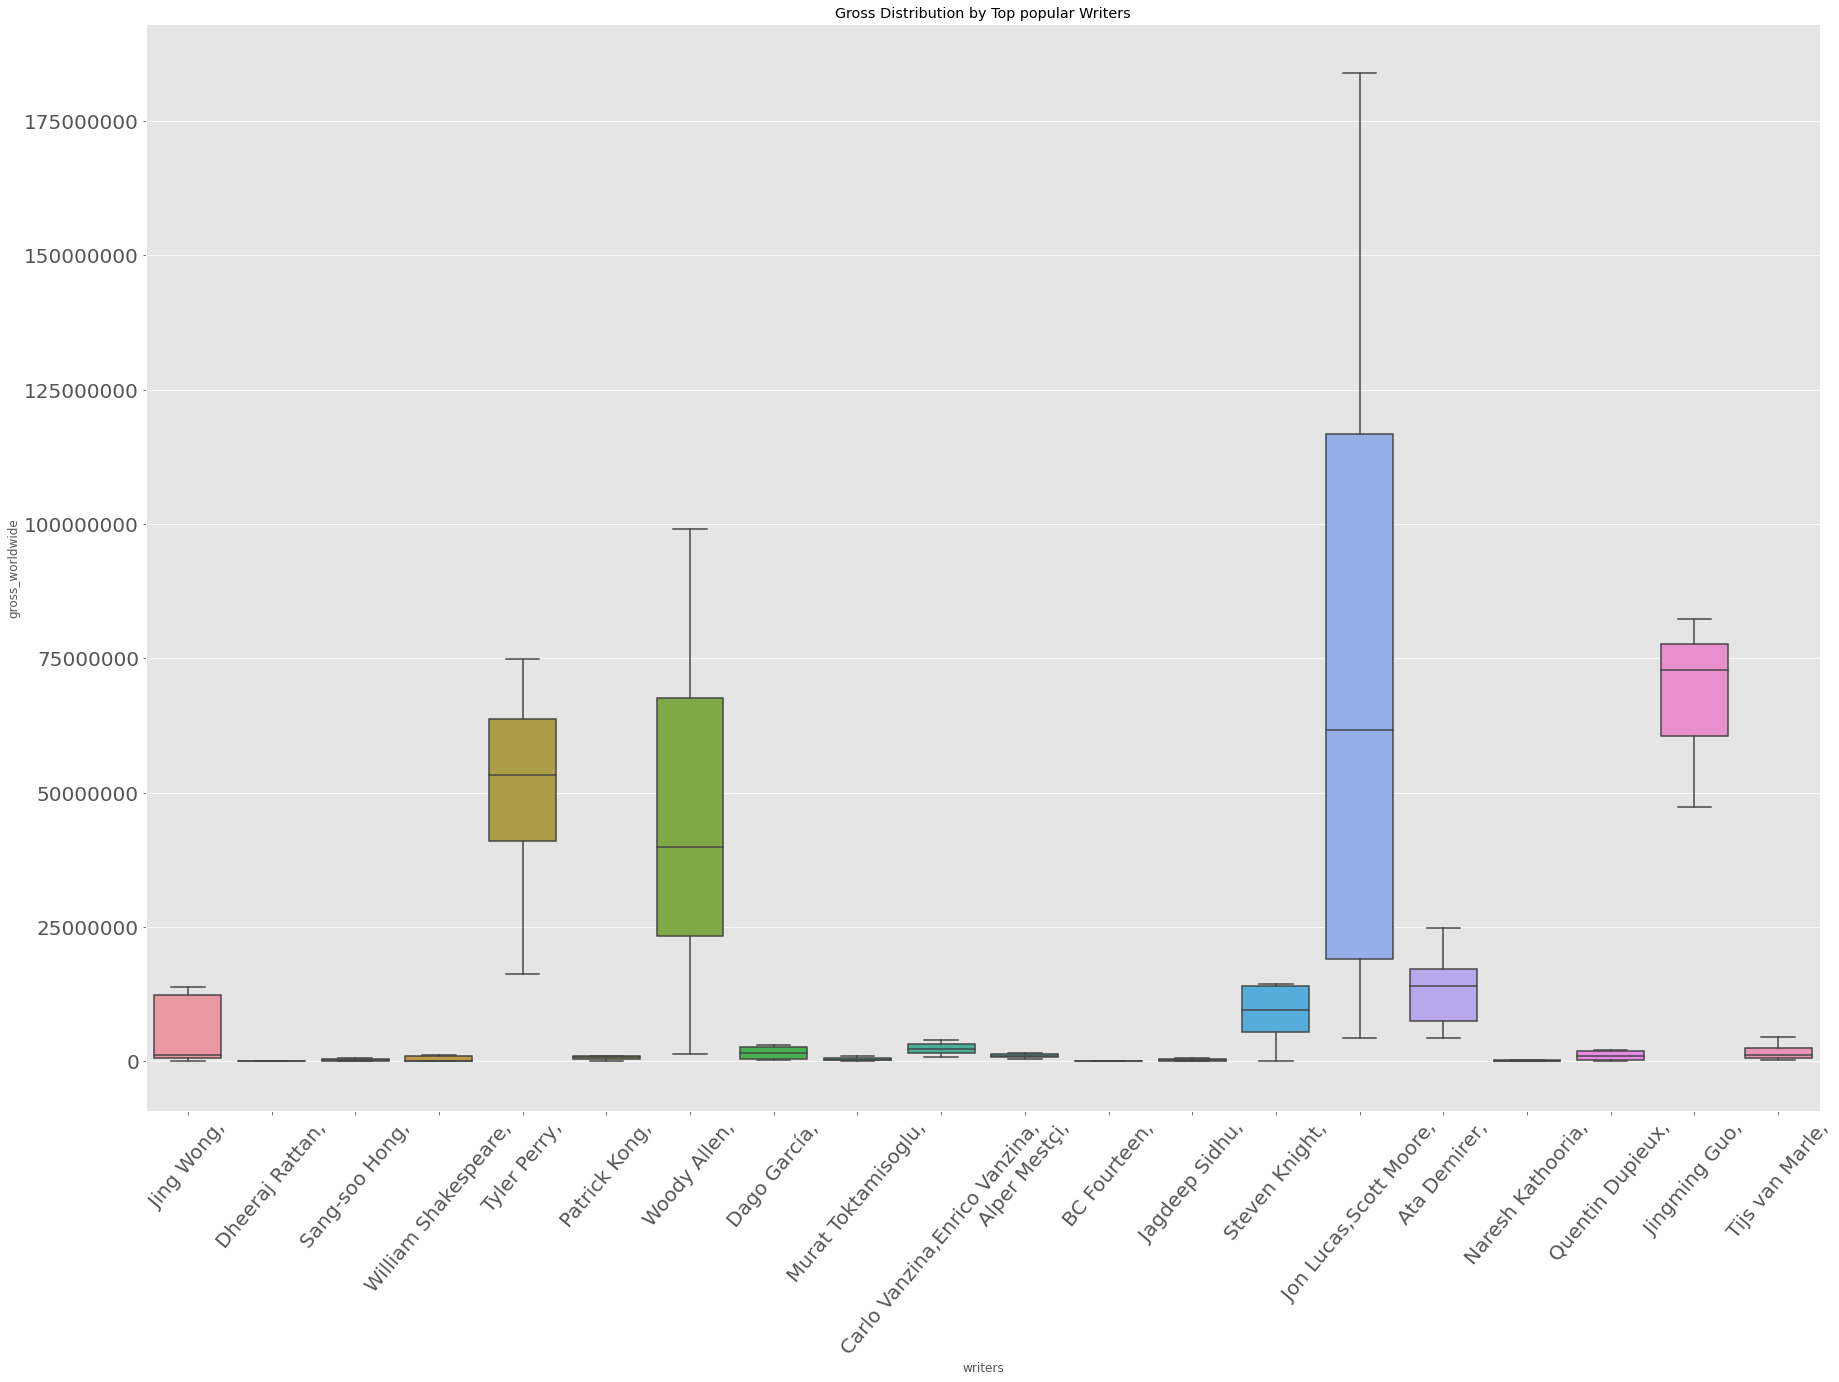

In [11]:
fig_dims = (30, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=df["gross_worldwide"], x=df["writers"],showfliers=False, order=df.writers.value_counts().index[0:20])
plt.xticks(fontsize=20)
plt.xticks(rotation=50)
plt.yticks(fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Gross Distribution by Top popular Writers')
plt.savefig('./graphs/don_bien/phan_loai/gross_by_writers', bbox_inches='tight')
plt.show()

#### Casts

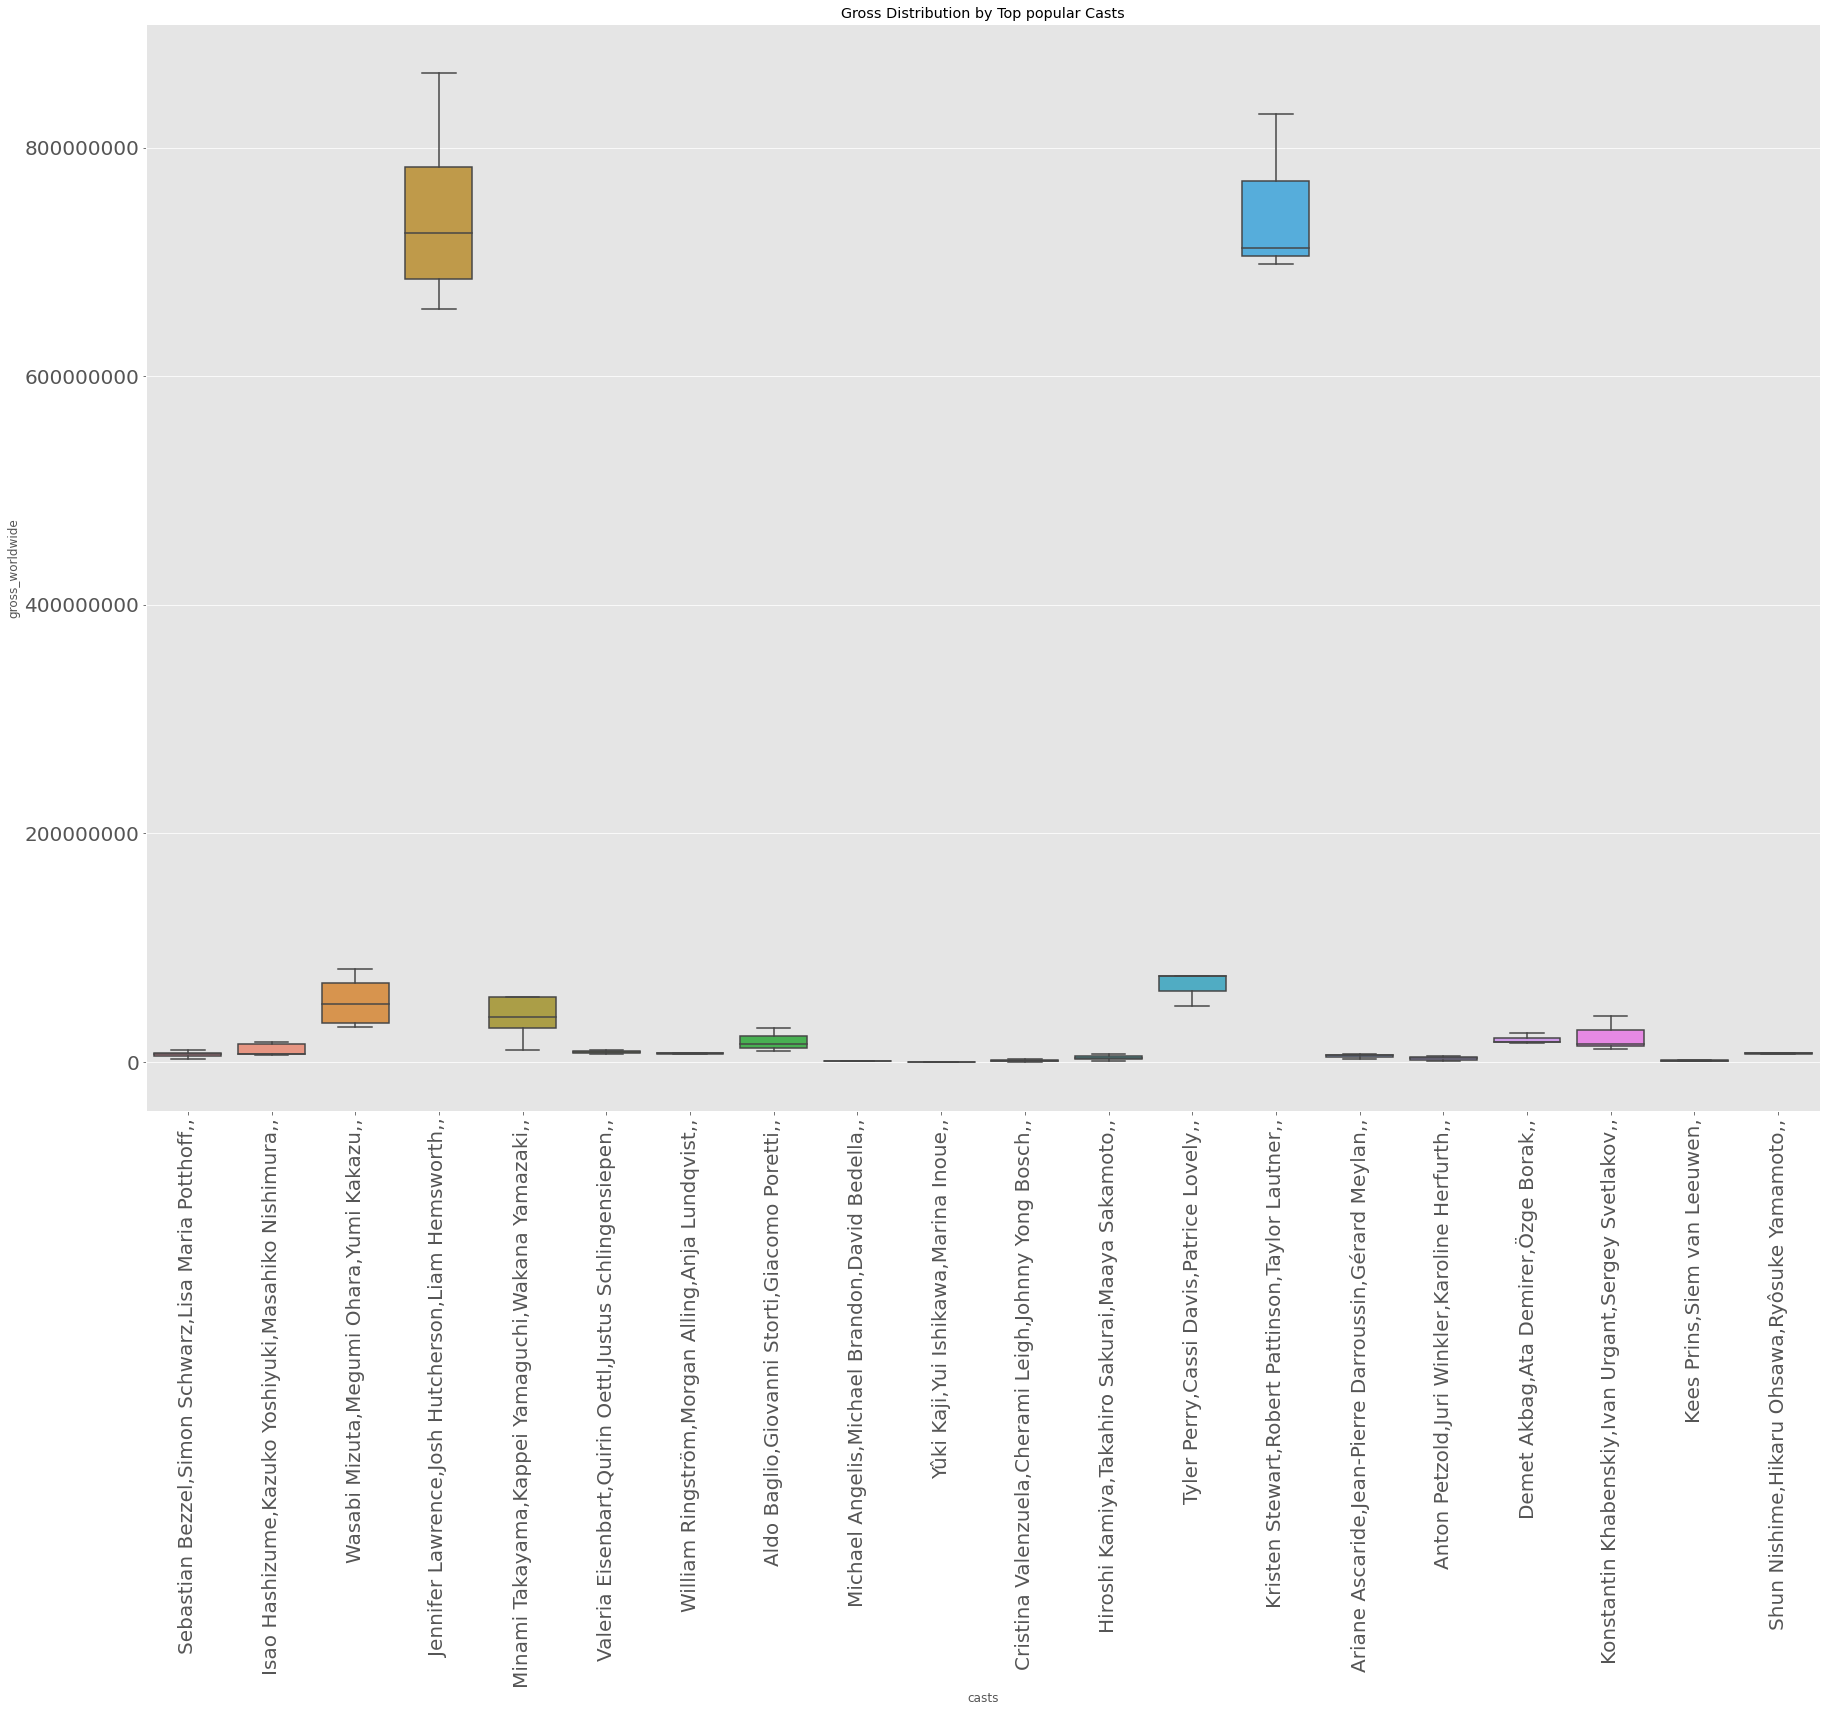

In [12]:
fig_dims = (30, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=df["gross_worldwide"], x=df["casts"],showfliers=False, order=df.casts.value_counts().index[0:20])
plt.xticks(fontsize=20)
plt.xticks(rotation=90)
plt.yticks(fontsize=20)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Gross Distribution by Top popular Casts')
plt.savefig('./graphs/don_bien/phan_loai/gross_by_casts' , bbox_inches='tight')
plt.show()

#### Certificate

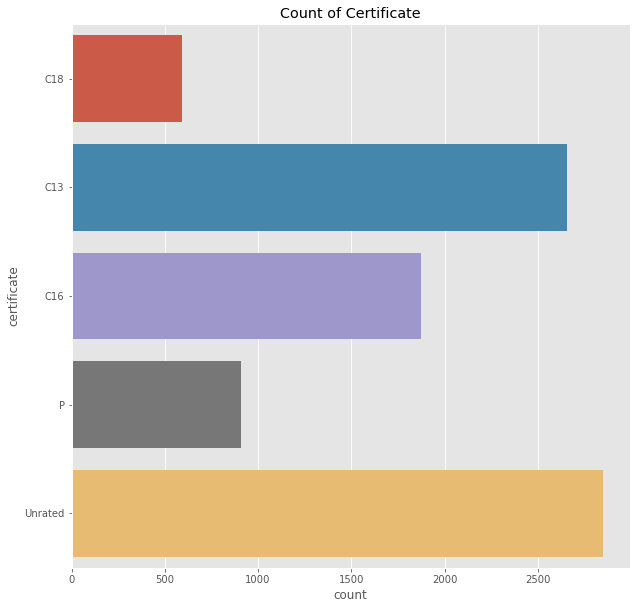

In [56]:
plt.figure(figsize=(10, 10))
sns.countplot(y="certificate",data=df)
plt.title('Count of Certificate') 
plt.savefig('./graphs/don_bien/phan_loai/certificate_count' , bbox_inches='tight')
plt.show()

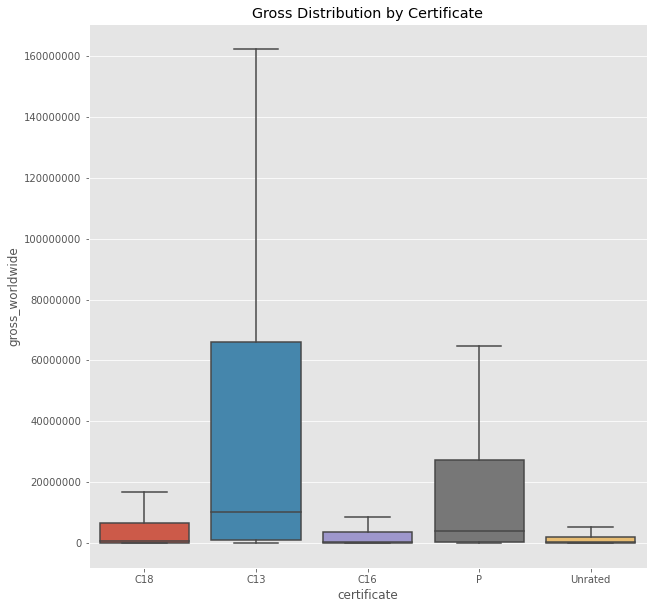

In [13]:
plt.figure(figsize=(10, 10))
sns.boxplot( y=df["gross_worldwide"], x=df["certificate"],showfliers=False)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Gross Distribution by Certificate')
plt.savefig('./graphs/don_bien/phan_loai/gross_by_certificate' , bbox_inches='tight')
plt.show()

#### Color

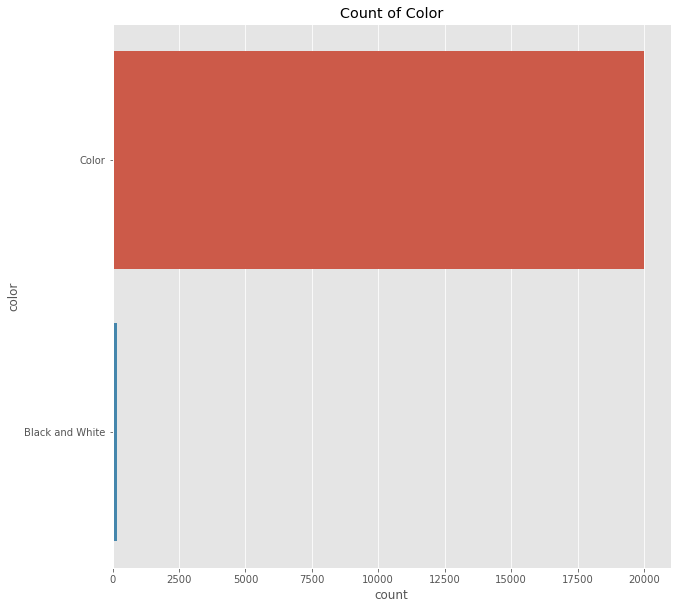

In [55]:
plt.figure(figsize=(10, 10))
sns.countplot(y="color",data=df)
plt.title('Count of Color') 
plt.savefig('./graphs/don_bien/phan_loai/color_count' , bbox_inches='tight')
plt.show()

Phim có màu có doanh thu phân bố cao hơn

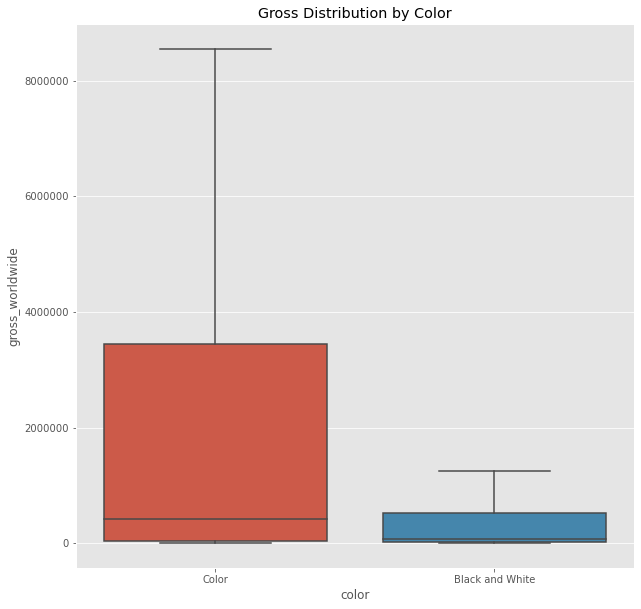

In [14]:
plt.figure(figsize=(10, 10))
sns.boxplot( y=df["gross_worldwide"], x=df["color"],showfliers=False)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Gross Distribution by Color')
plt.savefig('./graphs/don_bien/phan_loai/gross_by_color' , bbox_inches='tight')
plt.show()

#### Genres

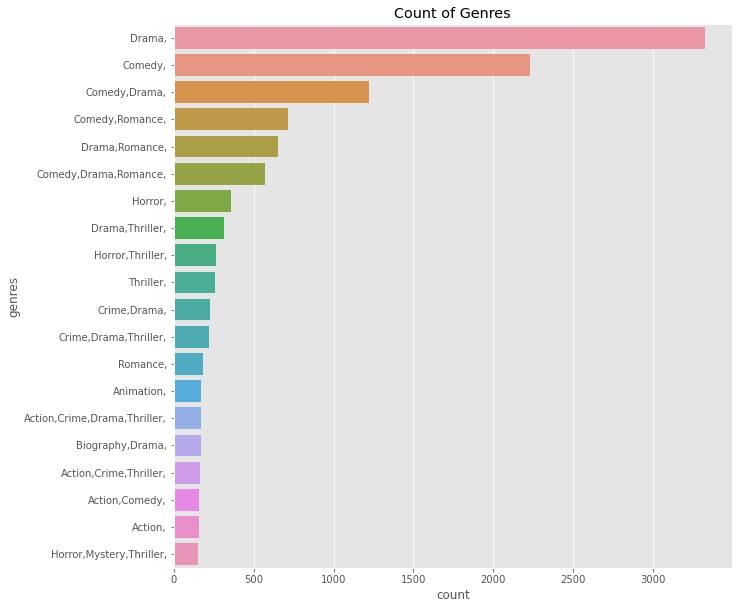

In [49]:
plt.figure(figsize=(10, 10))
sns.countplot(y="genres",data=df, order=df.genres.value_counts().index[0:20])
plt.title('Count of Genres')
plt.savefig('./graphs/don_bien/phan_loai/genres_count' , bbox_inches='tight')
plt.show()

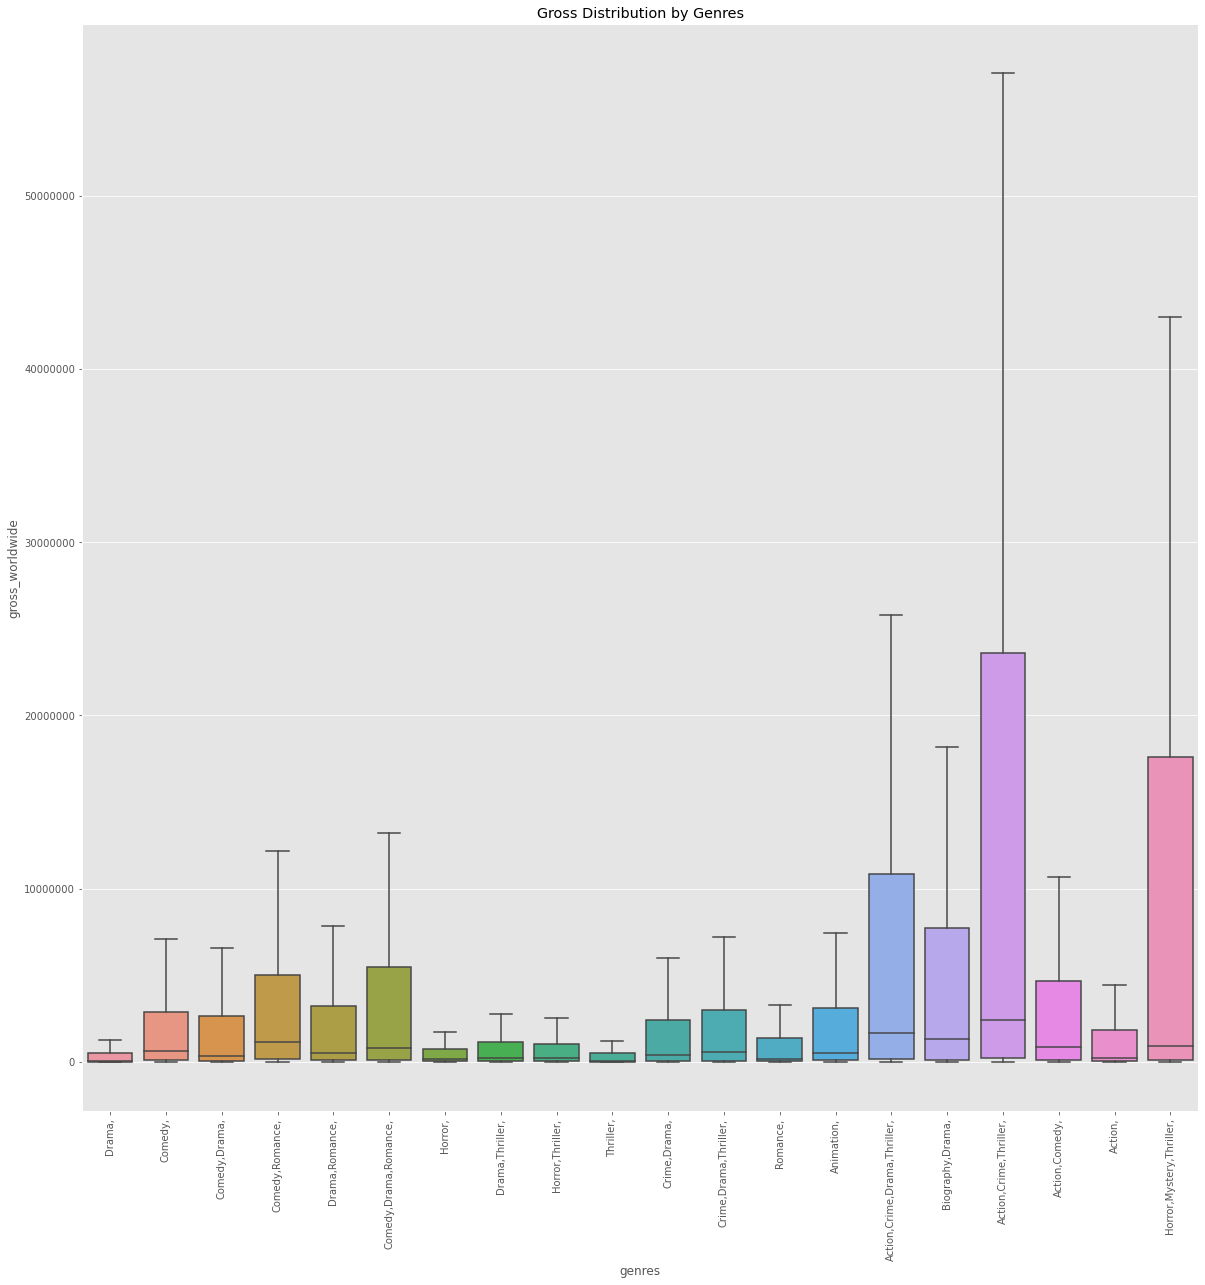

In [15]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=df["gross_worldwide"], x=df["genres"],showfliers=False, order=df.genres.value_counts().index[0:20])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.title('Gross Distribution by Genres')
plt.savefig('./graphs/don_bien/phan_loai/gross_by_genres' , bbox_inches='tight')
plt.show()

#### Languages

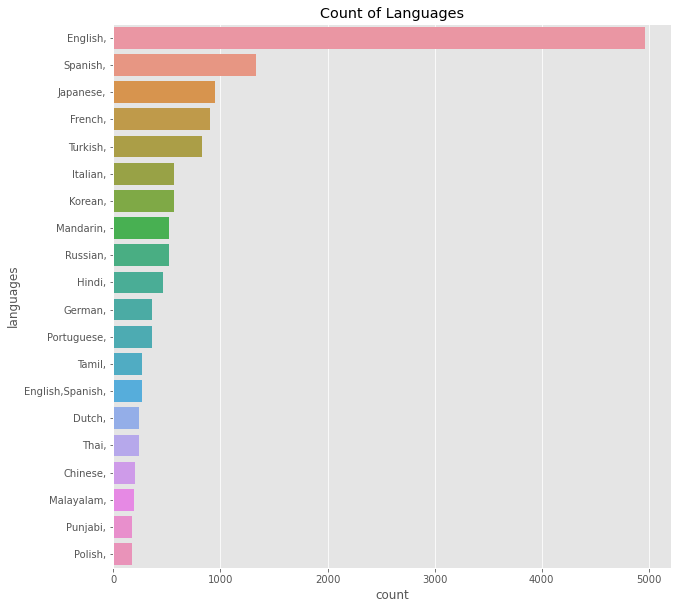

In [50]:
plt.figure(figsize=(10, 10))
sns.countplot(y="languages",data=df, order=df.languages.value_counts().index[0:20])
plt.title('Count of Languages')
plt.savefig('./graphs/don_bien/phan_loai/languages_count' , bbox_inches='tight')
plt.show()

Hầu hết các phim khi ra rạp đều có ngôn ngữ là tiếng Anh

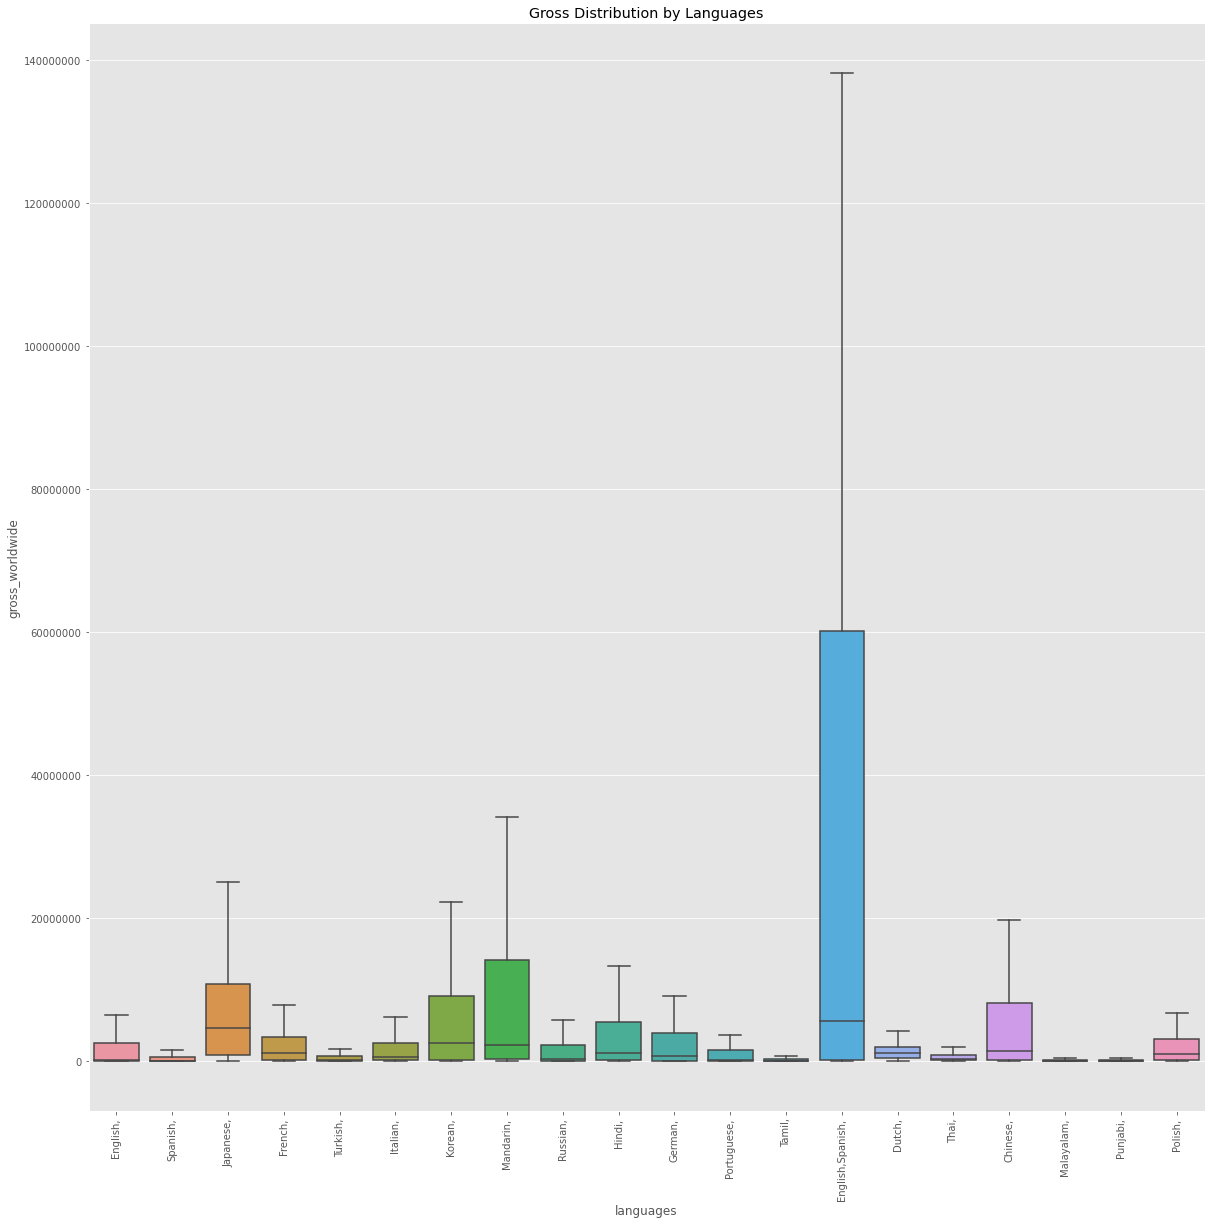

In [16]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=df["gross_worldwide"], x=df["languages"],showfliers=False, order=df.languages.value_counts().index[0:20])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.title('Gross Distribution by Languages')
plt.savefig('./graphs/don_bien/phan_loai/gross_by_languages' , bbox_inches='tight')
plt.show()

#### Countries_of_origin

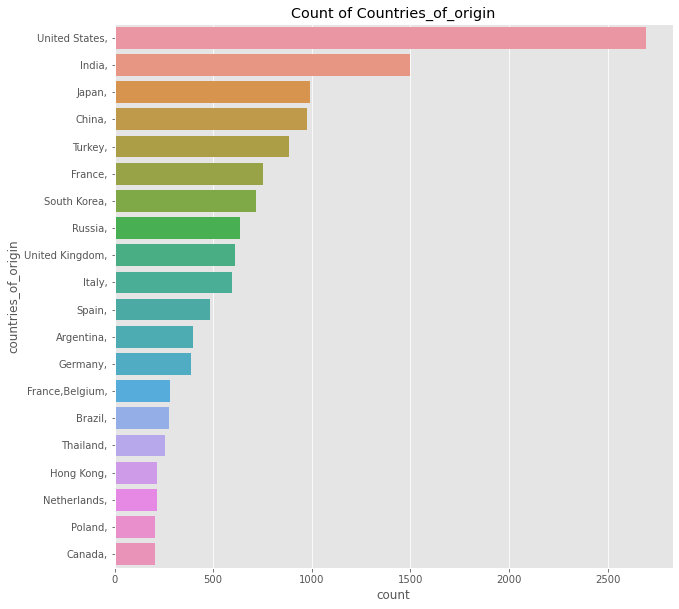

In [52]:
plt.figure(figsize=(10, 10))
sns.countplot(y="countries_of_origin",data=df, order=df.countries_of_origin.value_counts().index[0:20])
plt.title('Count of Countries_of_origin')
plt.savefig('./graphs/don_bien/phan_loai/countries_of_origin_count' , bbox_inches='tight')
plt.show()

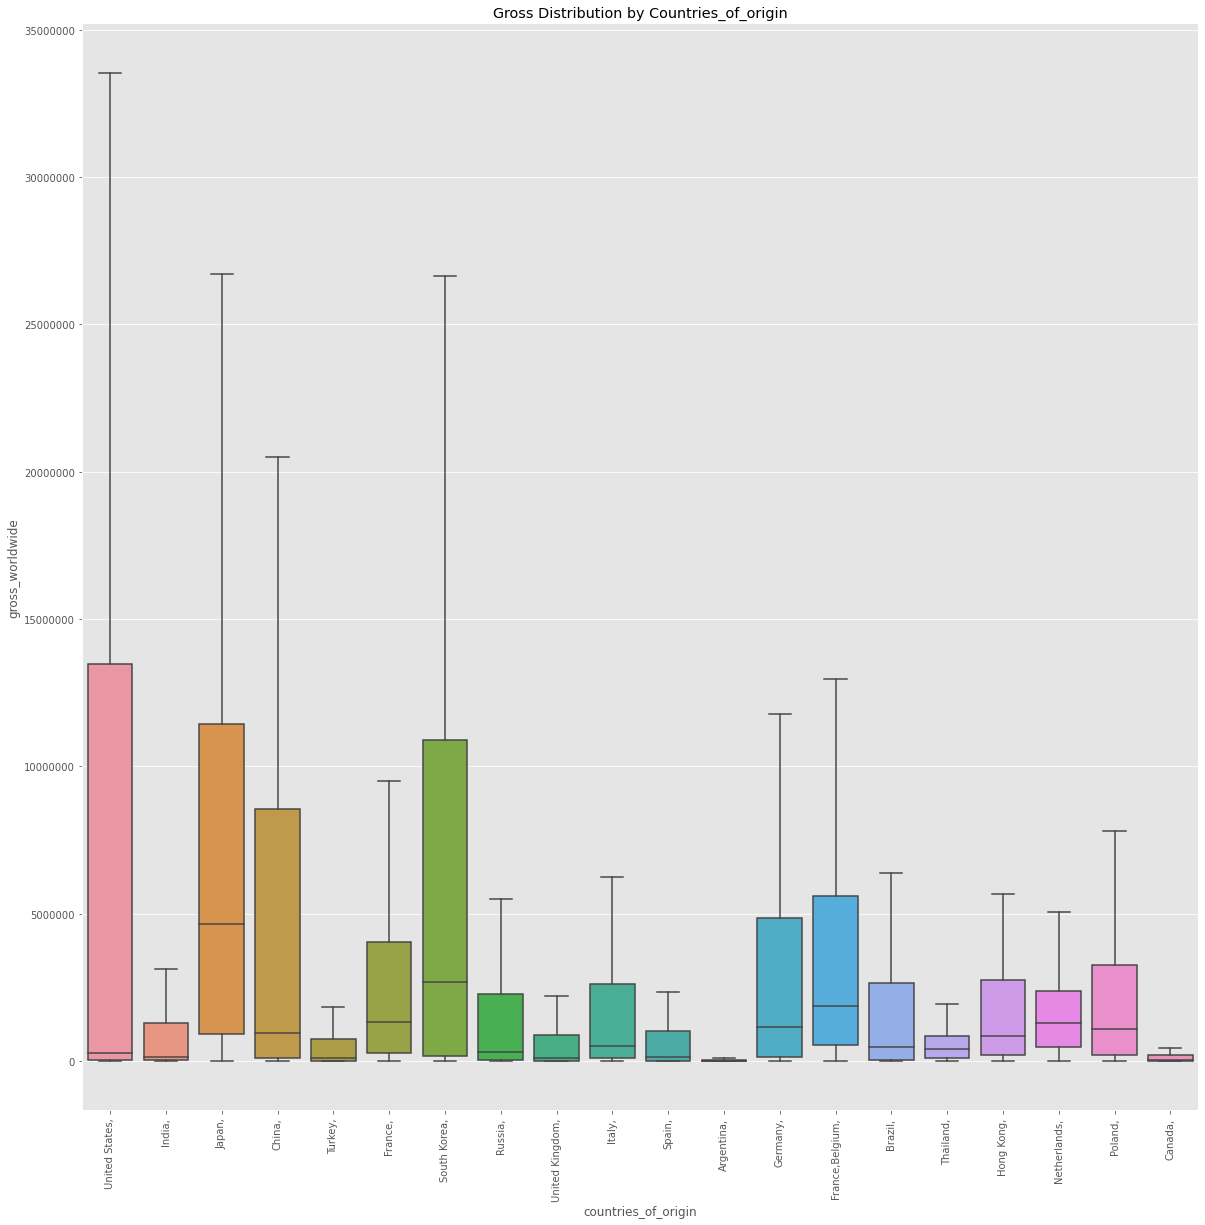

In [17]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=df["gross_worldwide"], x=df["countries_of_origin"],showfliers=False, order=df.countries_of_origin.value_counts().index[0:20])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.title('Gross Distribution by Countries_of_origin')
plt.savefig('./graphs/don_bien/phan_loai/gross_by_countries' , bbox_inches='tight')
plt.show()

#### Production_companies

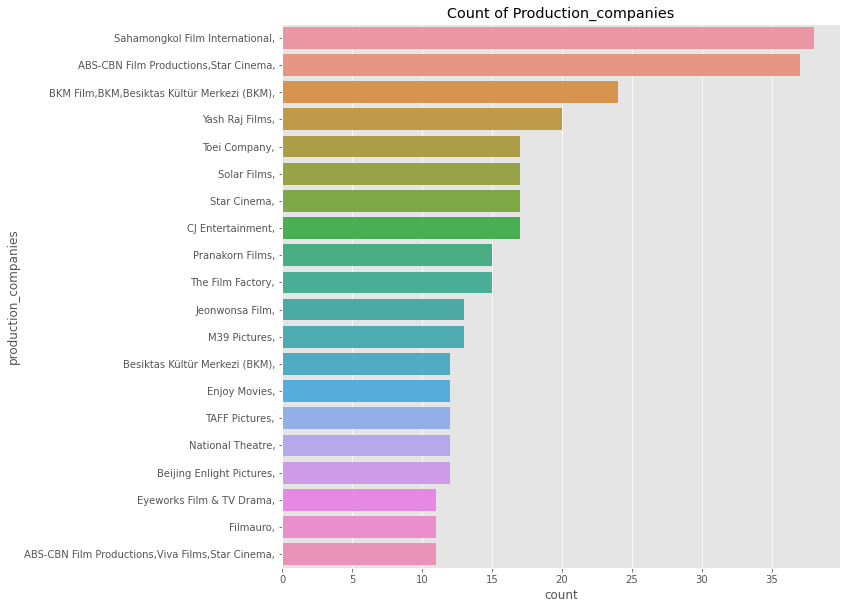

In [53]:
plt.figure(figsize=(10, 10))
sns.countplot(y="production_companies",data=df, order=df.production_companies.value_counts().index[0:20])
plt.title('Count of Production_companies')
plt.savefig('./graphs/don_bien/phan_loai/production_companies_count' , bbox_inches='tight')
plt.show()

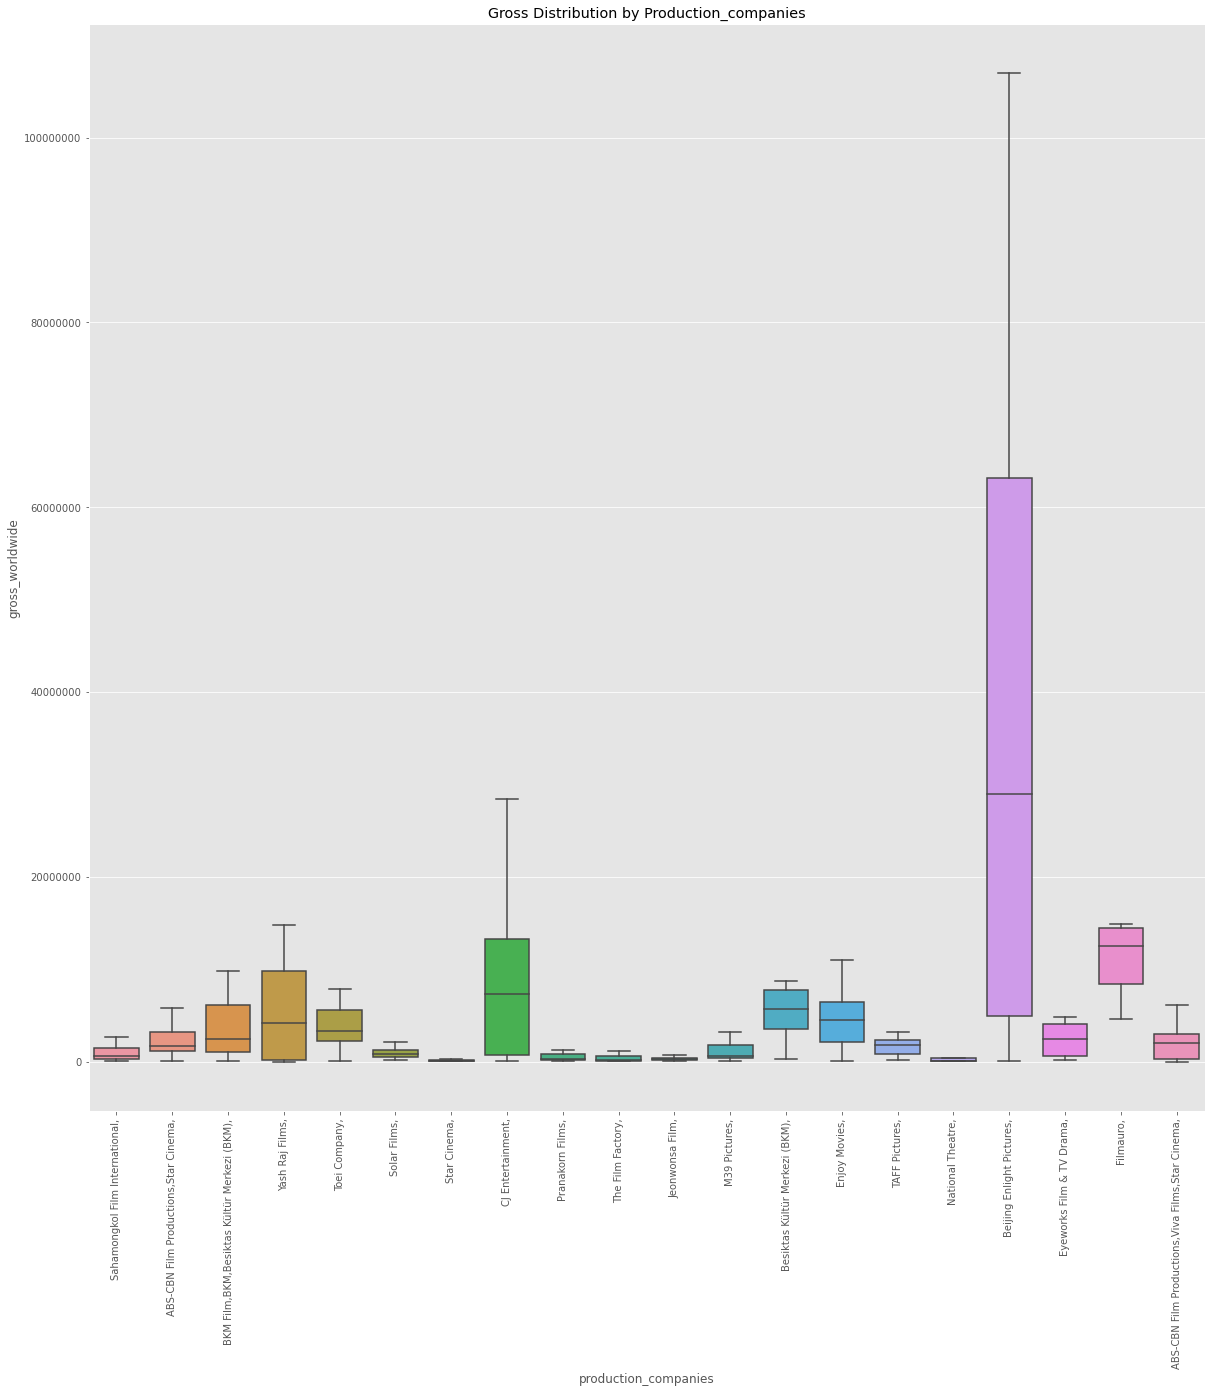

In [18]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=df["gross_worldwide"], x=df["production_companies"],showfliers=False, order=df.production_companies.value_counts().index[0:20])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.title('Gross Distribution by Production_companies')
plt.savefig('./graphs/don_bien/phan_loai/gross_by_production_companies' , bbox_inches='tight')
plt.show()

#### Sound_mix

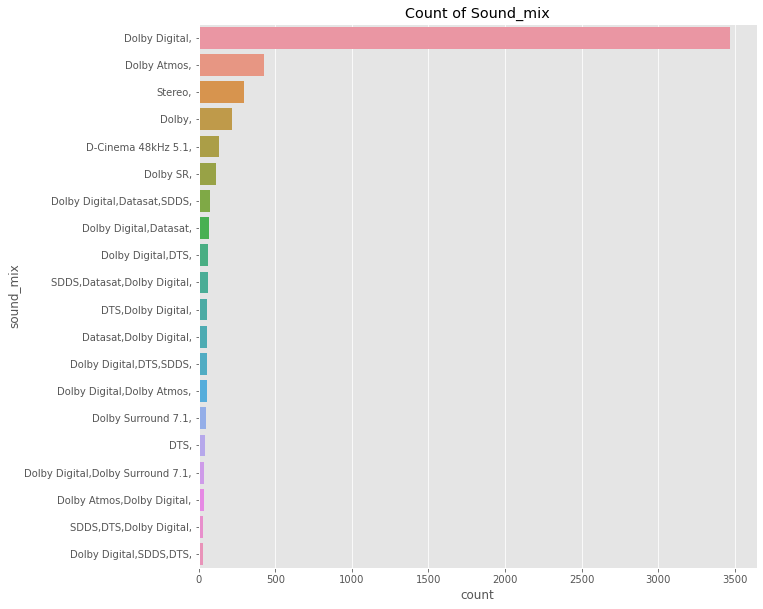

In [54]:
plt.figure(figsize=(10, 10))
sns.countplot(y="sound_mix",data=df, order=df.sound_mix.value_counts().index[0:20])
plt.title('Count of Sound_mix') 
plt.savefig('./graphs/don_bien/phan_loai/sound_mix_count' , bbox_inches='tight')
plt.show()

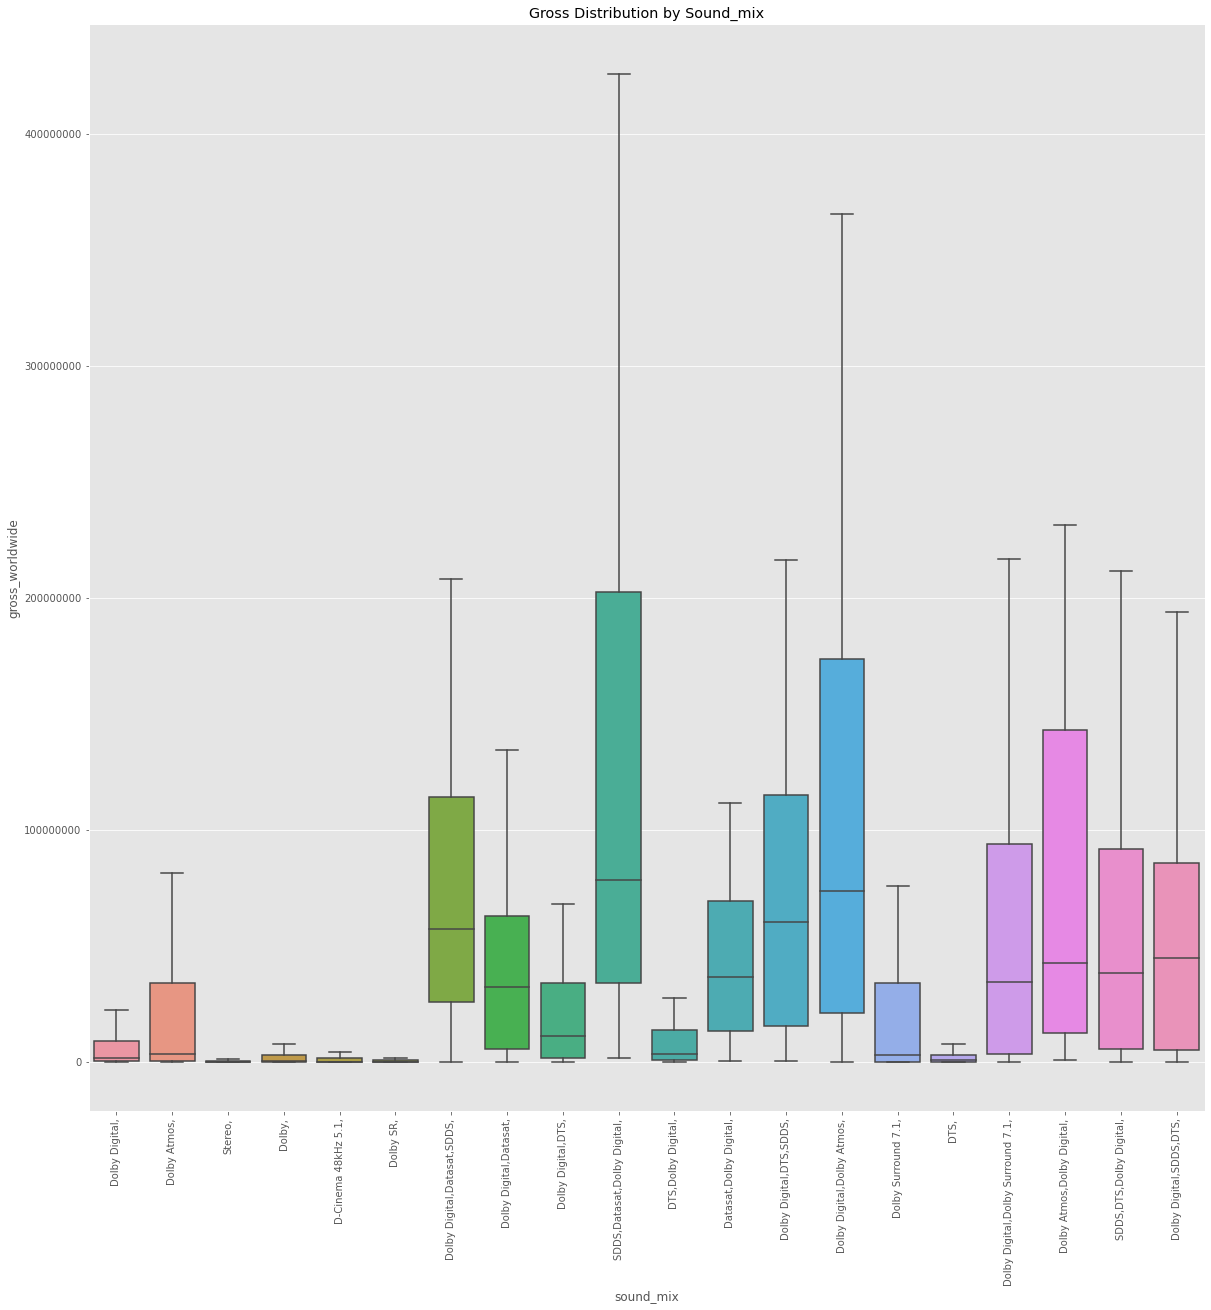

In [19]:
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=df["gross_worldwide"], x=df["sound_mix"],showfliers=False, order=df.sound_mix.value_counts().index[0:20])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90) 
plt.title('Gross Distribution by Sound_mix')
plt.savefig('./graphs/don_bien/phan_loai/gross_by_sound_mix' , bbox_inches='tight')
plt.show()

### Biến định lượng

#### Boxplot without Fliers

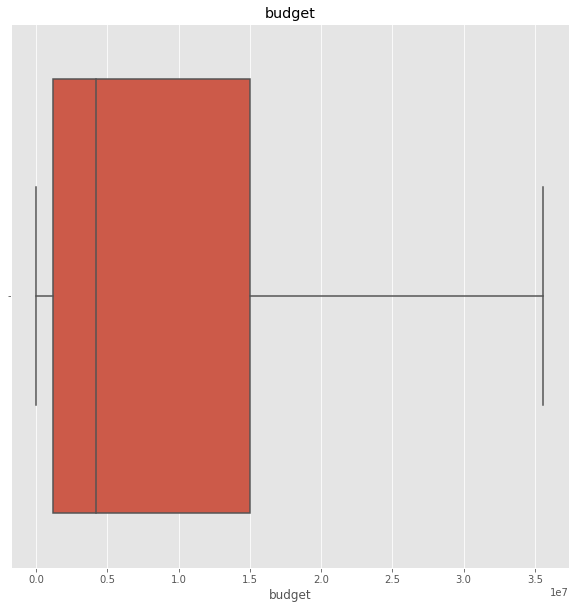

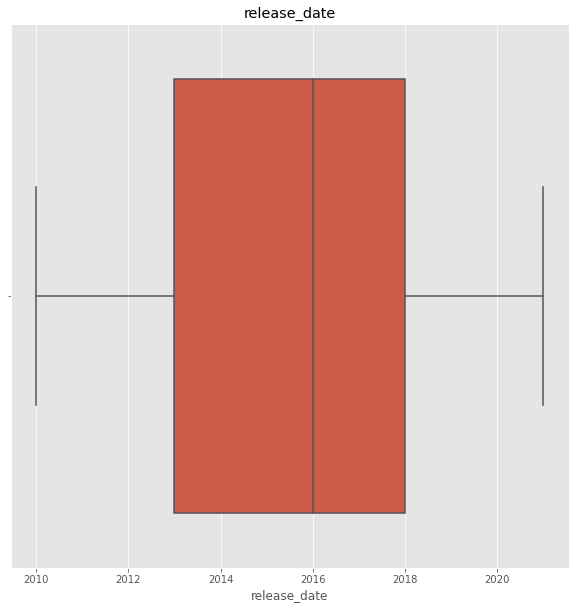

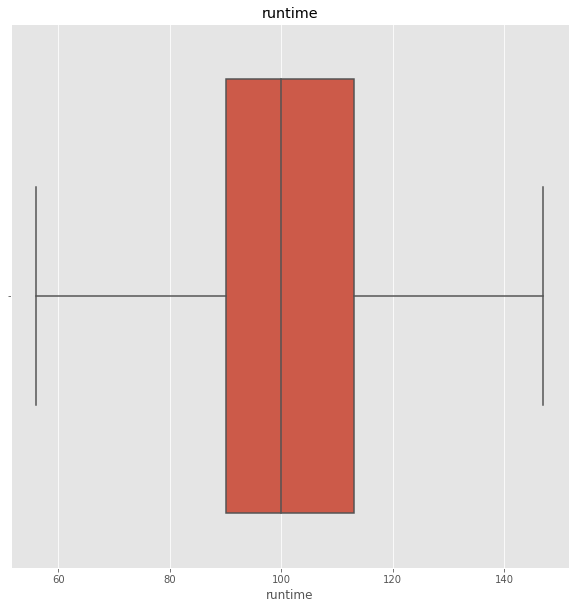

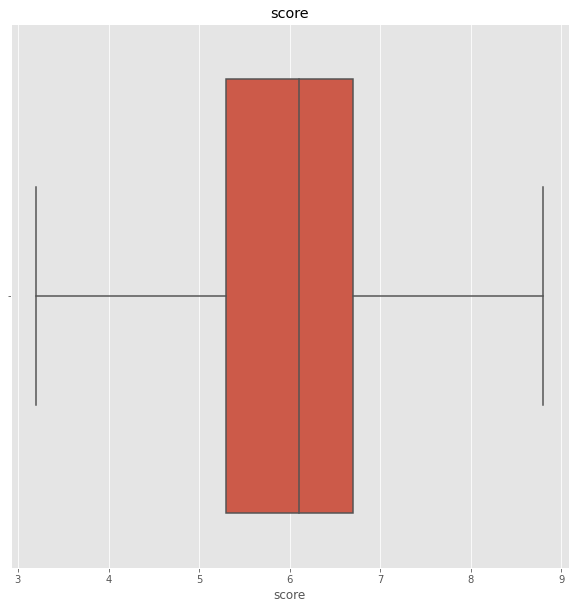

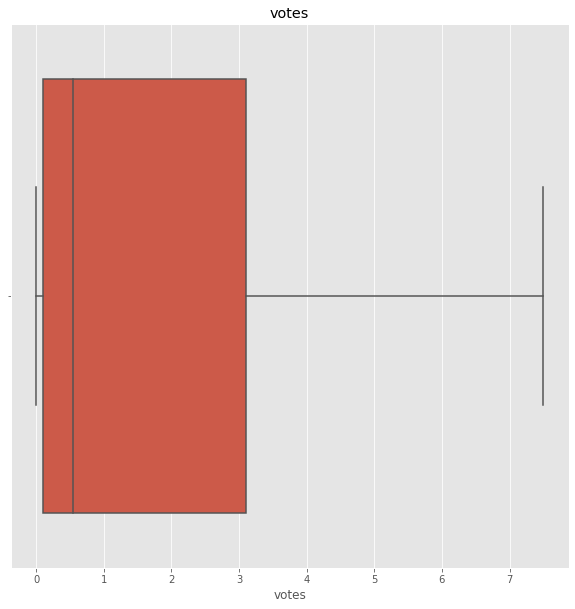

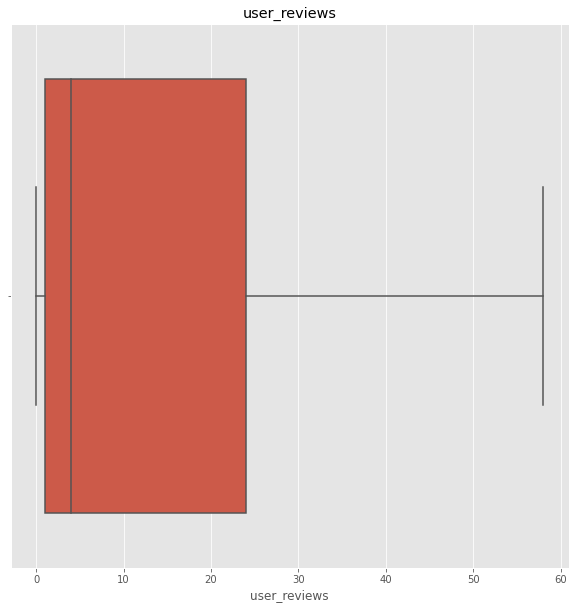

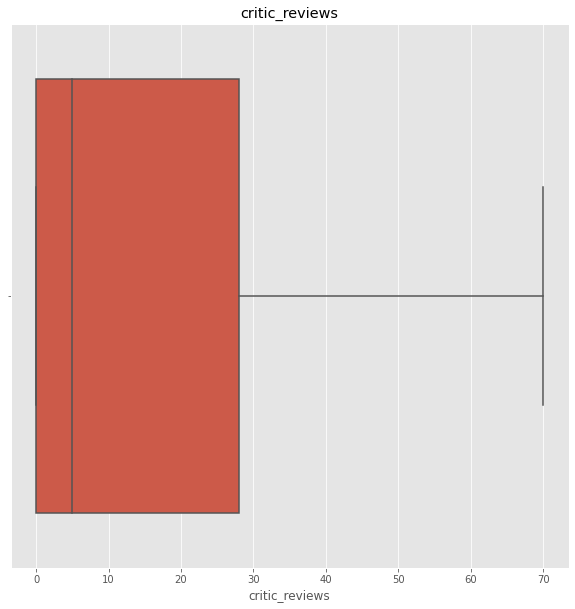

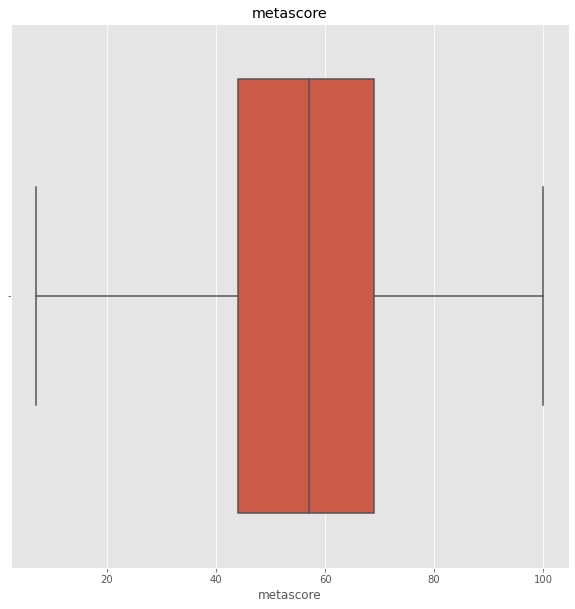

In [20]:
features = ['budget', 'release_date', 'runtime', 'score', 'votes', 'user_reviews', 'critic_reviews', 'metascore']

for feature in features:
    plt.figure(figsize=(10, 10))
    sns.boxplot(x=feature, data = df, showfliers=False)
    plt.title(f"{feature}")
    plt.savefig(f'./graphs/don_bien/dinh_luong/{feature}_boxplot', transparent=False)
    plt.show()

#### Boxplot without Fliers

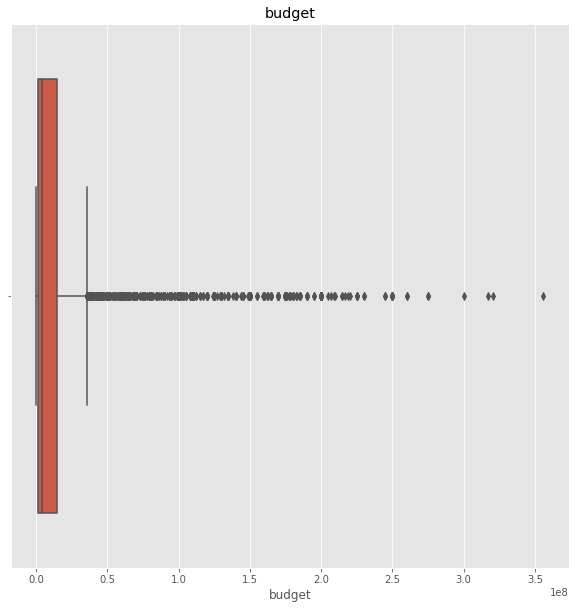

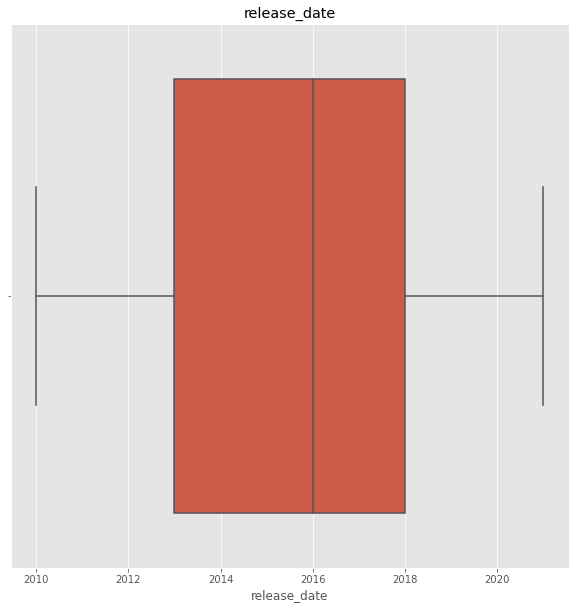

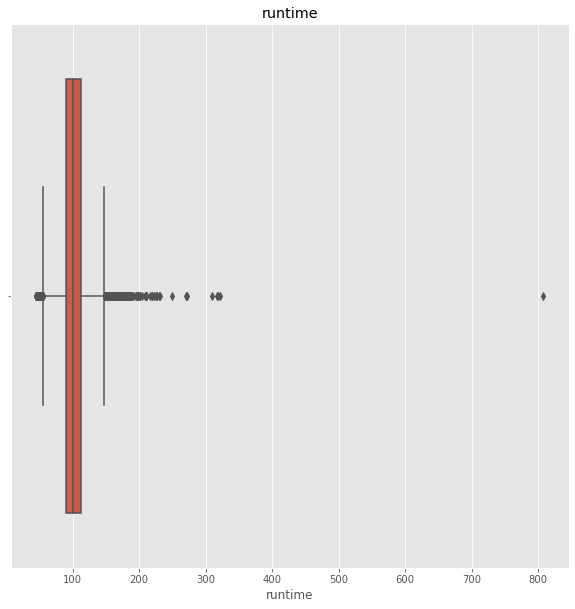

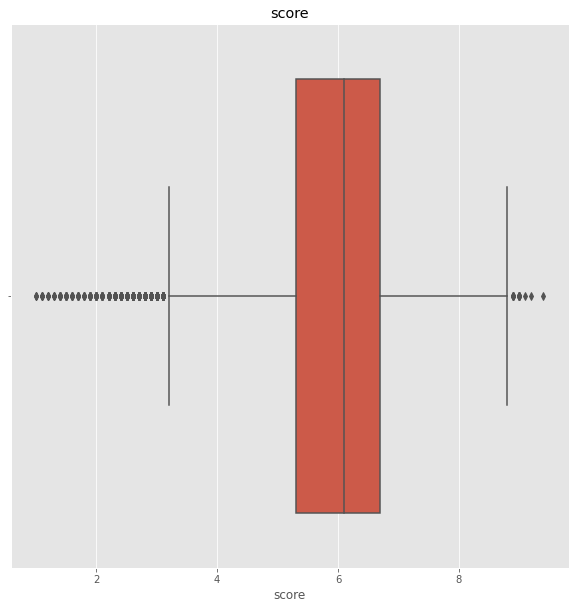

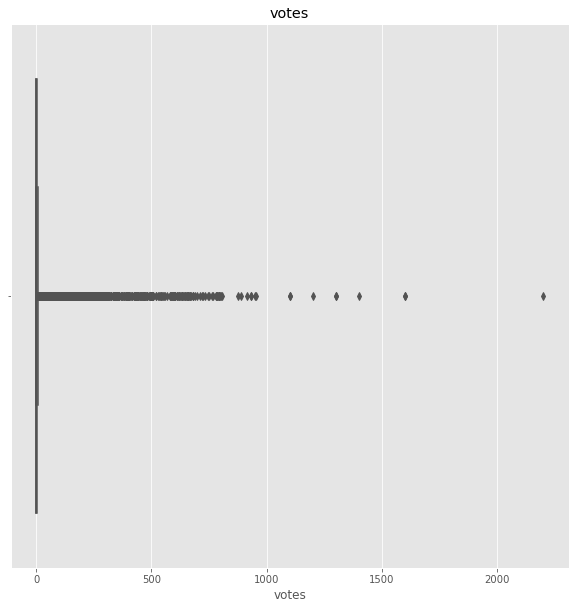

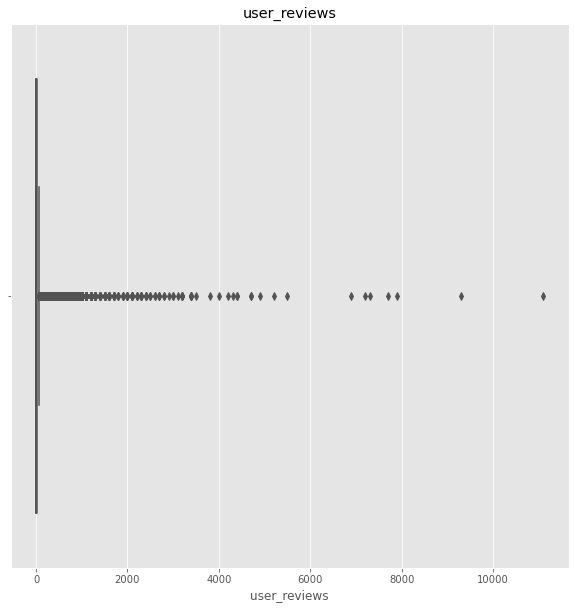

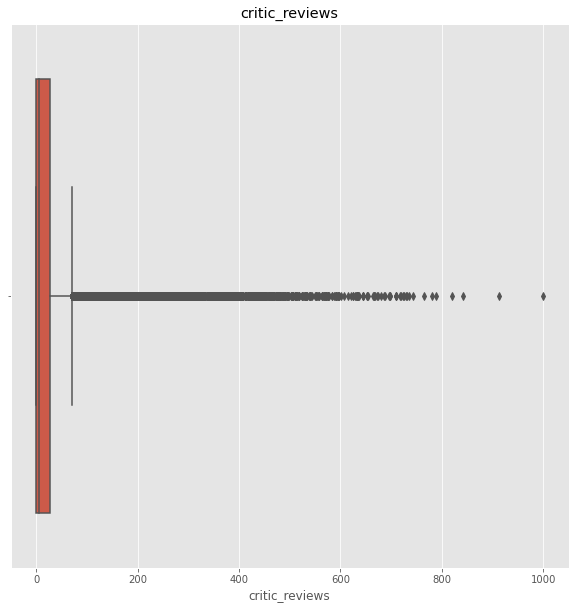

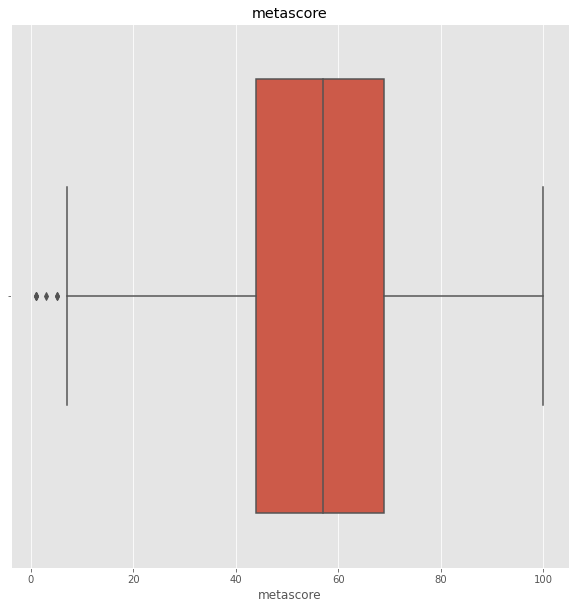

In [21]:
features = ['budget', 'release_date', 'runtime', 'score', 'votes', 'user_reviews', 'critic_reviews', 'metascore']

for feature in features:
    plt.figure(figsize=(10, 10))
    sns.boxplot(x=feature, data = df, showfliers=True)
    plt.title(f"{feature}")
    plt.savefig(f'./graphs/don_bien/dinh_luong/{feature}_boxplot_fliers', transparent=False)
    plt.show()

#### Correlation matrix

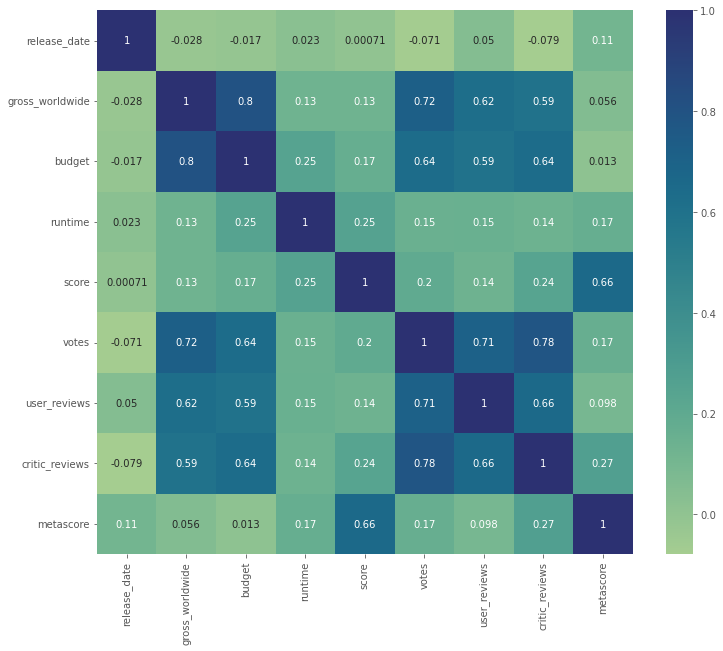

In [22]:
plt.figure(figsize=(12, 10))
corr = df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, cmap='crest')

plt.savefig(f'./graphs/don_bien/dinh_luong/correlation_matrix', transparent=False)

plt.show()

#### Regplot

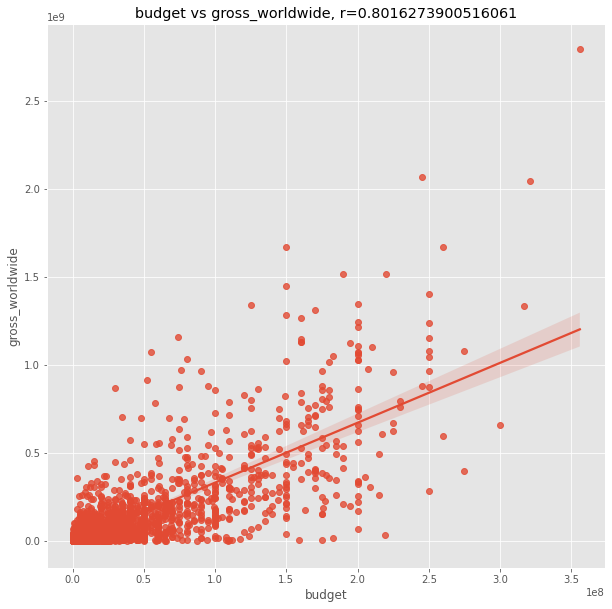

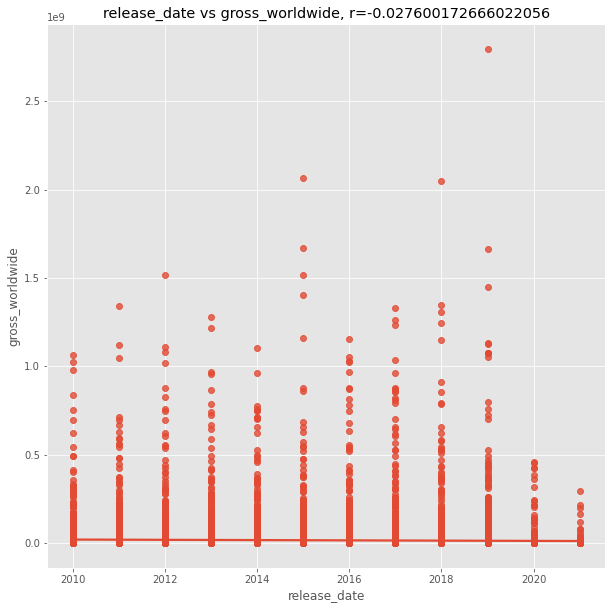

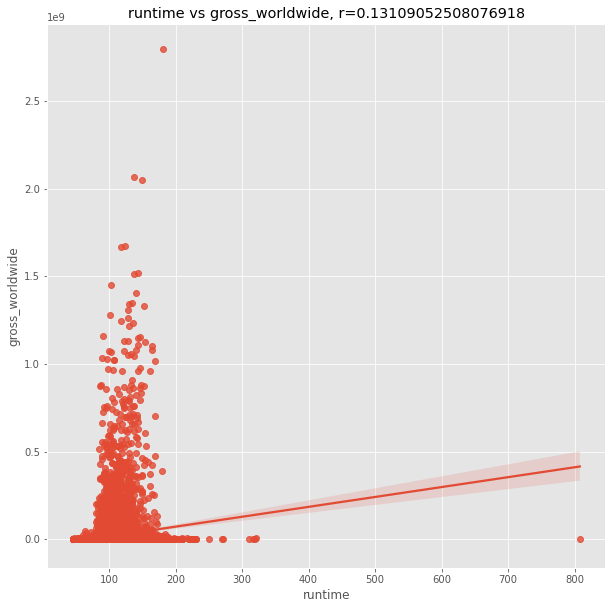

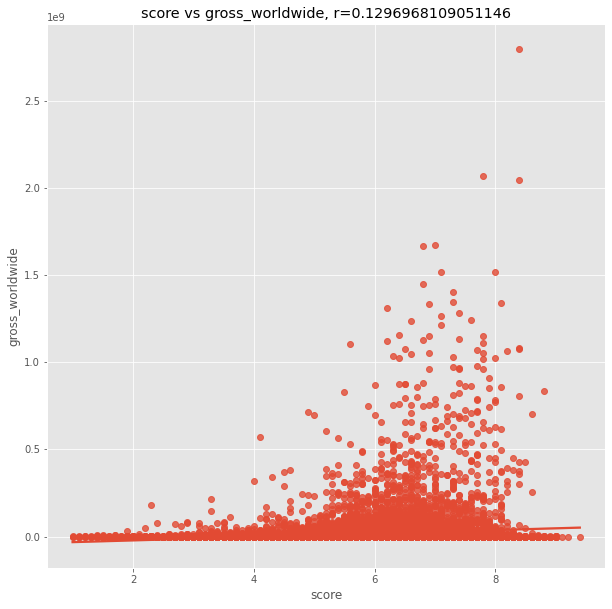

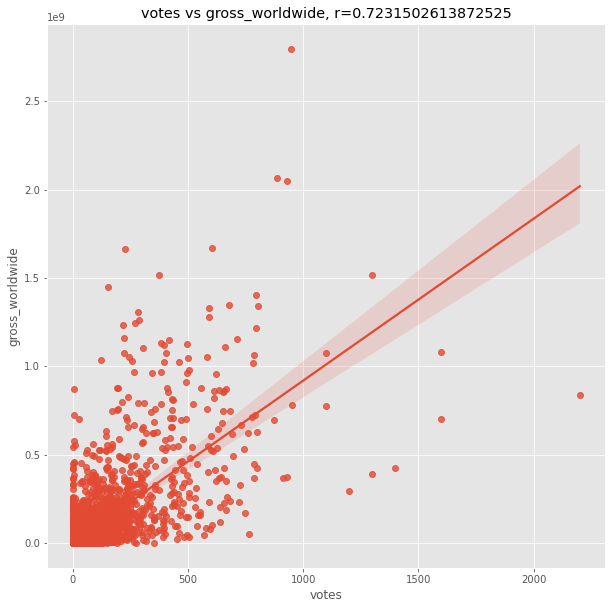

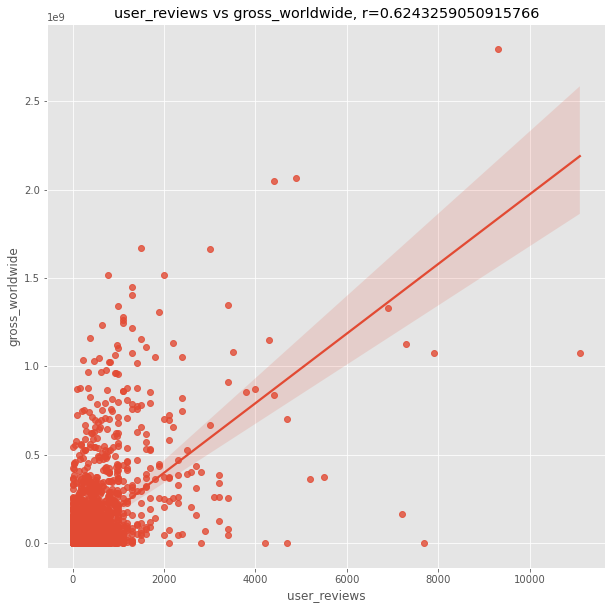

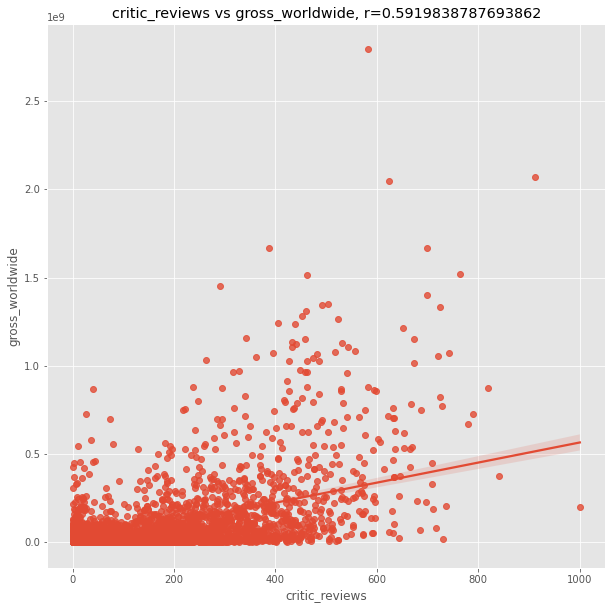

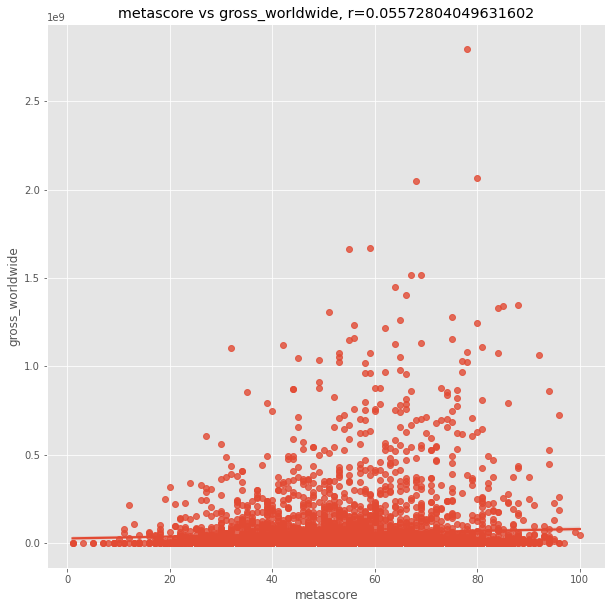

In [23]:
features = ['budget', 'release_date', 'runtime', 'score', 'votes', 'user_reviews', 'critic_reviews', 'metascore']

for feature in features:
    plt.figure(figsize=(10, 10))
    sns.regplot(x=feature, y='gross_worldwide', data = df)
    plt.title(f"{feature} vs gross_worldwide, r={df.corr()['gross_worldwide'][feature]}")
    plt.savefig(f'./graphs/don_bien/dinh_luong/{feature}_vs_gross_worldwide', transparent=False)
    plt.show()

## Đa biến

In [24]:
yearsr = df['release_date'].apply(year_to_str)
df['cer_color'] = df['certificate'] + ' ' + df['color']
df['color_year'] = df['color'] + ' '+yearsr
df['cer_color_year']= df['cer_color'] + ' ' +yearsr
df['year_cer'] = df['certificate'] + ' '+yearsr

### Color-Release_date

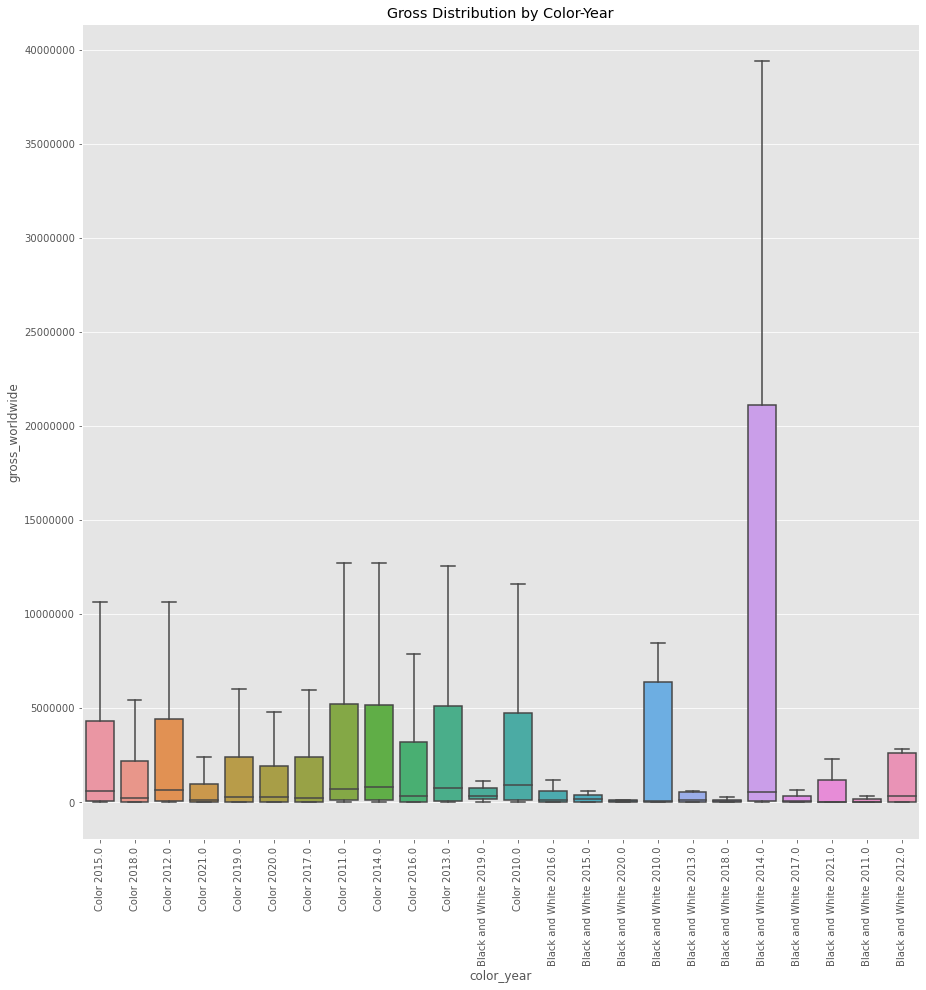

In [25]:
plt.figure(figsize=(15,15))
sns.boxplot( y=df["gross_worldwide"], x=df["color_year"],showfliers=False)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.title('Gross Distribution by Color-Year')
plt.savefig('./graphs/da_bien/gross_by_color_year' , bbox_inches='tight')
plt.show()

### Certificate-Color

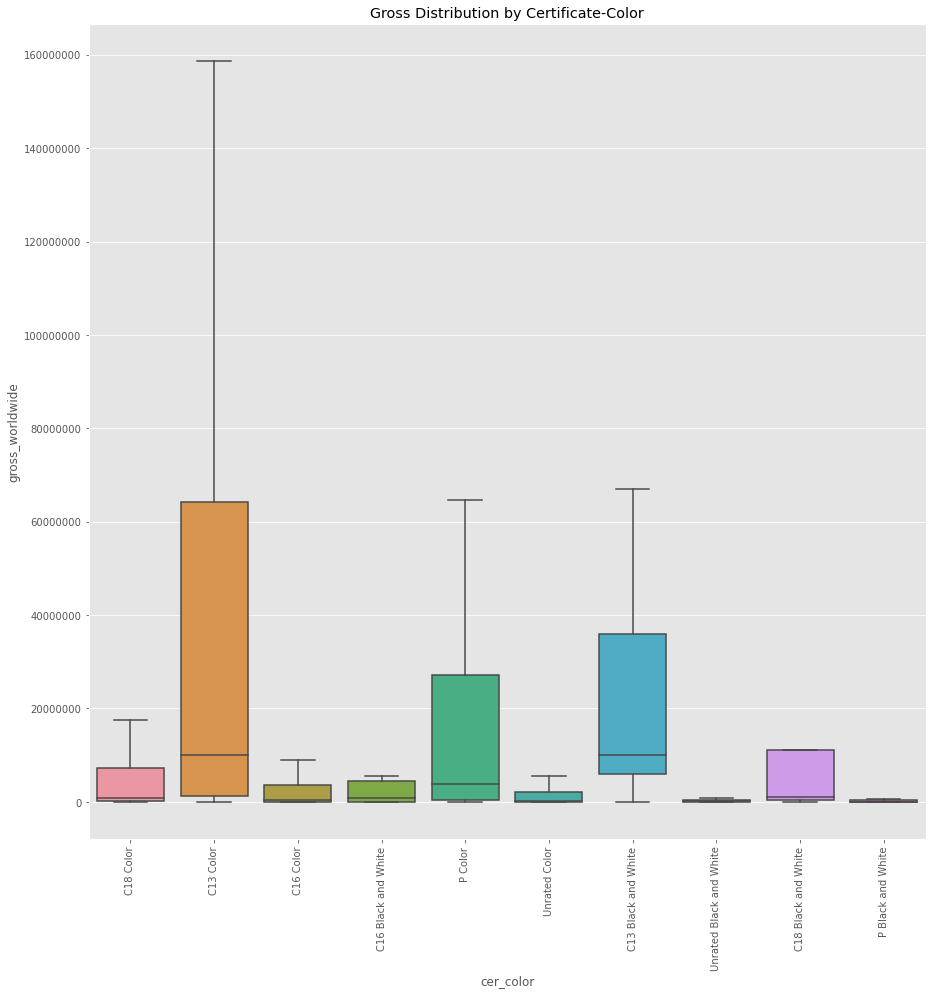

In [26]:
plt.figure(figsize=(15,15))
sns.boxplot( y=df["gross_worldwide"], x=df["cer_color"],showfliers=False)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.title('Gross Distribution by Certificate-Color')
plt.savefig('./graphs/da_bien/gross_by_certificate_color' , bbox_inches='tight')
plt.show()

### Certificate-Year

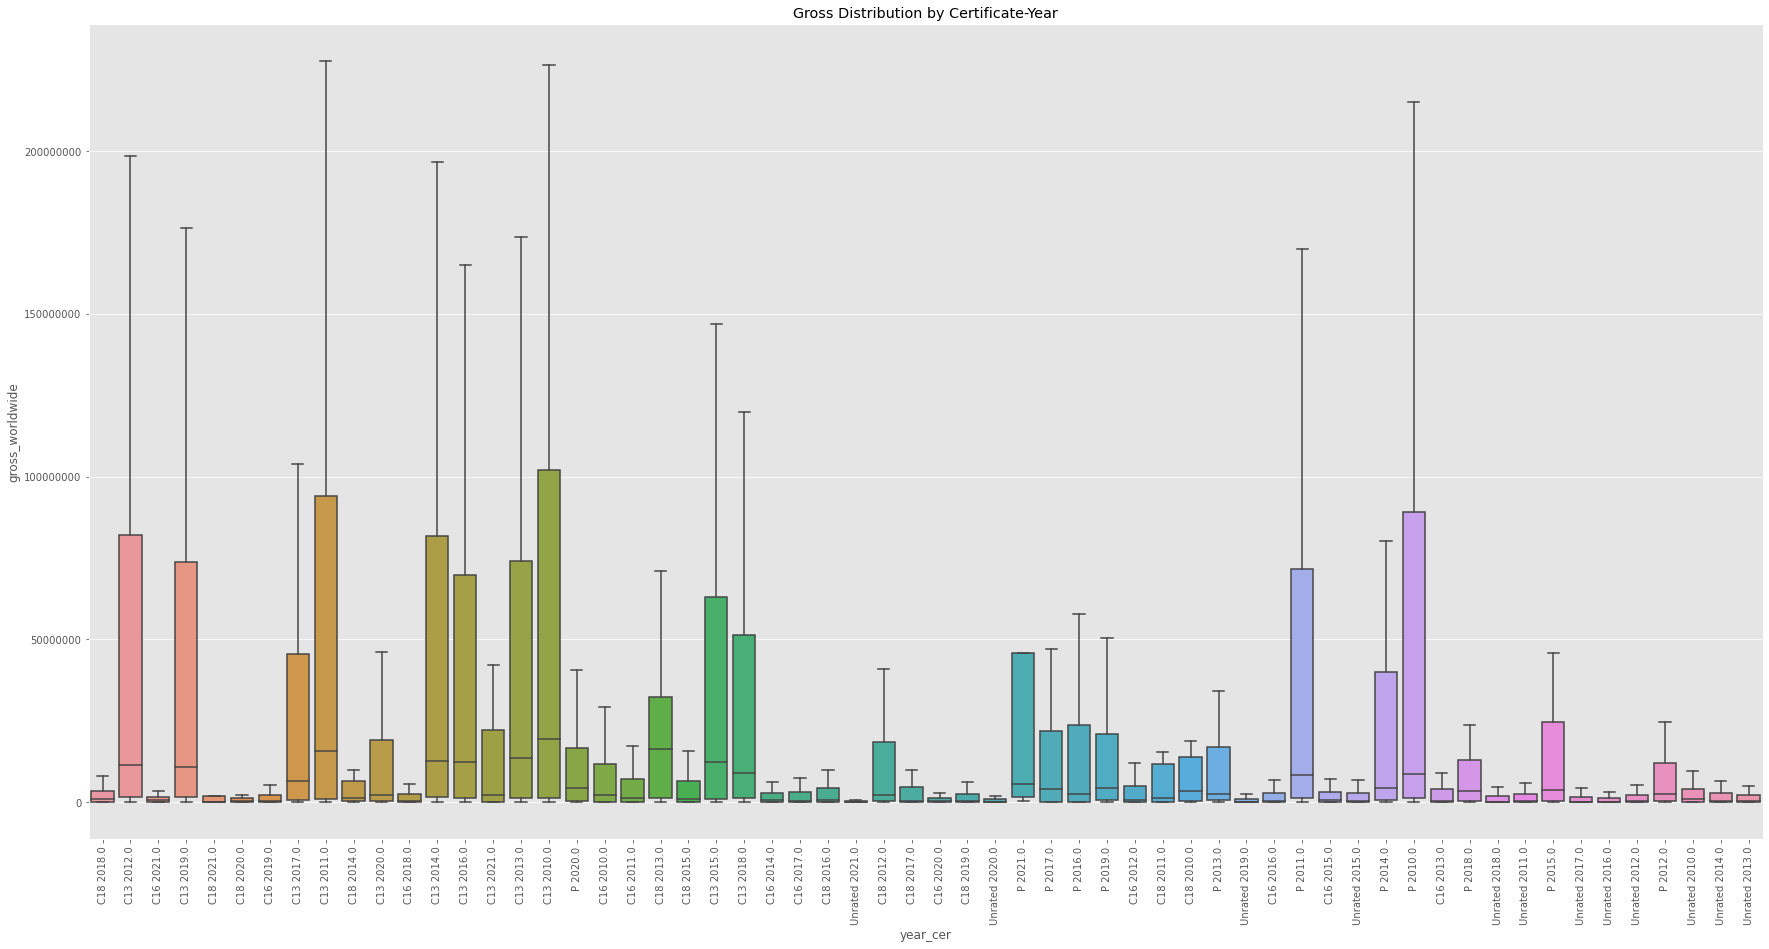

In [27]:
plt.figure(figsize=(30,15))
sns.boxplot( y=df["gross_worldwide"], x=df["year_cer"],showfliers=False)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.title('Gross Distribution by Certificate-Year')
plt.savefig('./graphs/da_bien/gross_by_certificate_year' , bbox_inches='tight')
plt.show()

### Certificate-Color-Year

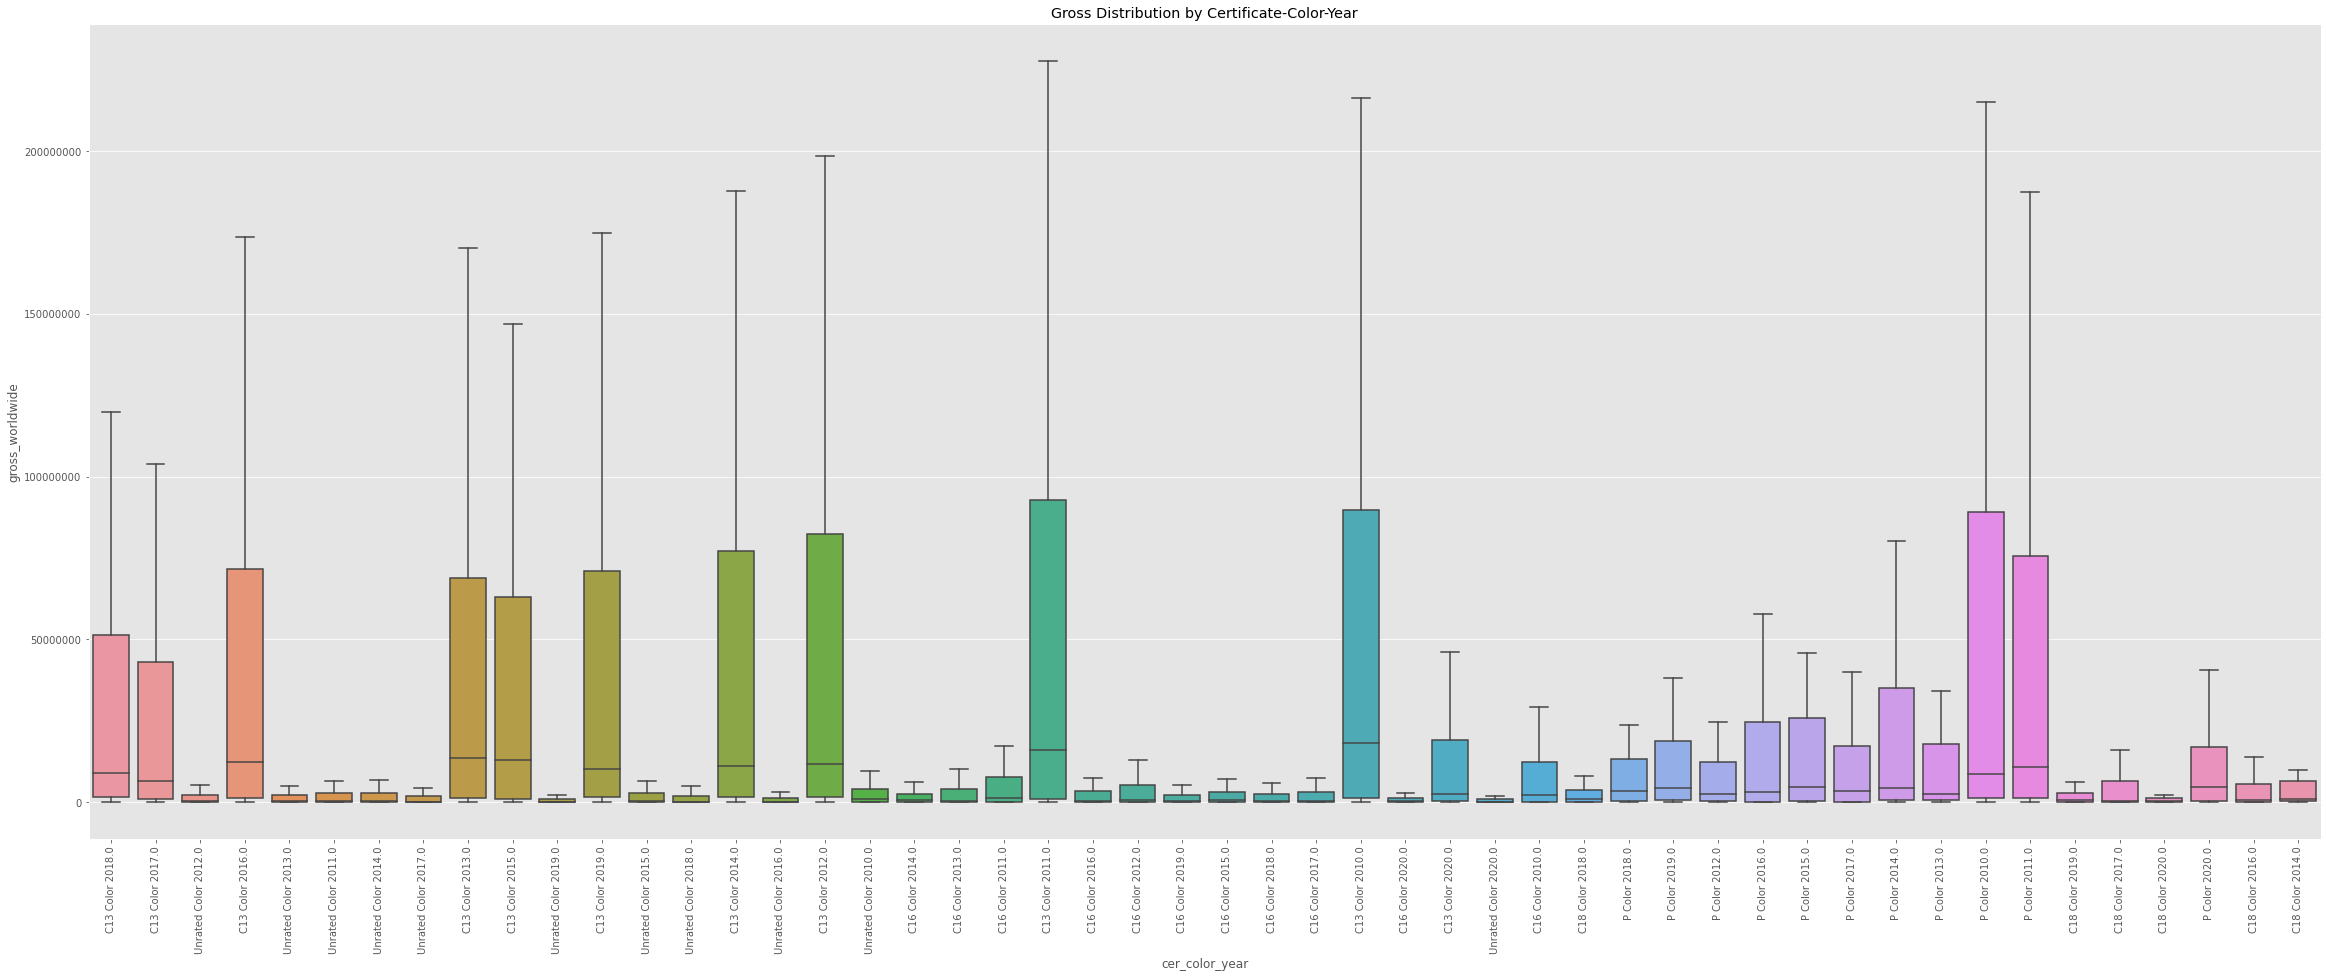

In [28]:
plt.figure(figsize=(40,15))
sns.boxplot( y=df["gross_worldwide"], x=df["cer_color_year"],showfliers=False, order=df.cer_color_year.value_counts().index[0:50])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.title('Gross Distribution by Certificate-Color-Year')
plt.savefig('./graphs/da_bien/gross_by_certificate_color_year' , bbox_inches='tight')
plt.show()

### AspectRatio_Certificate

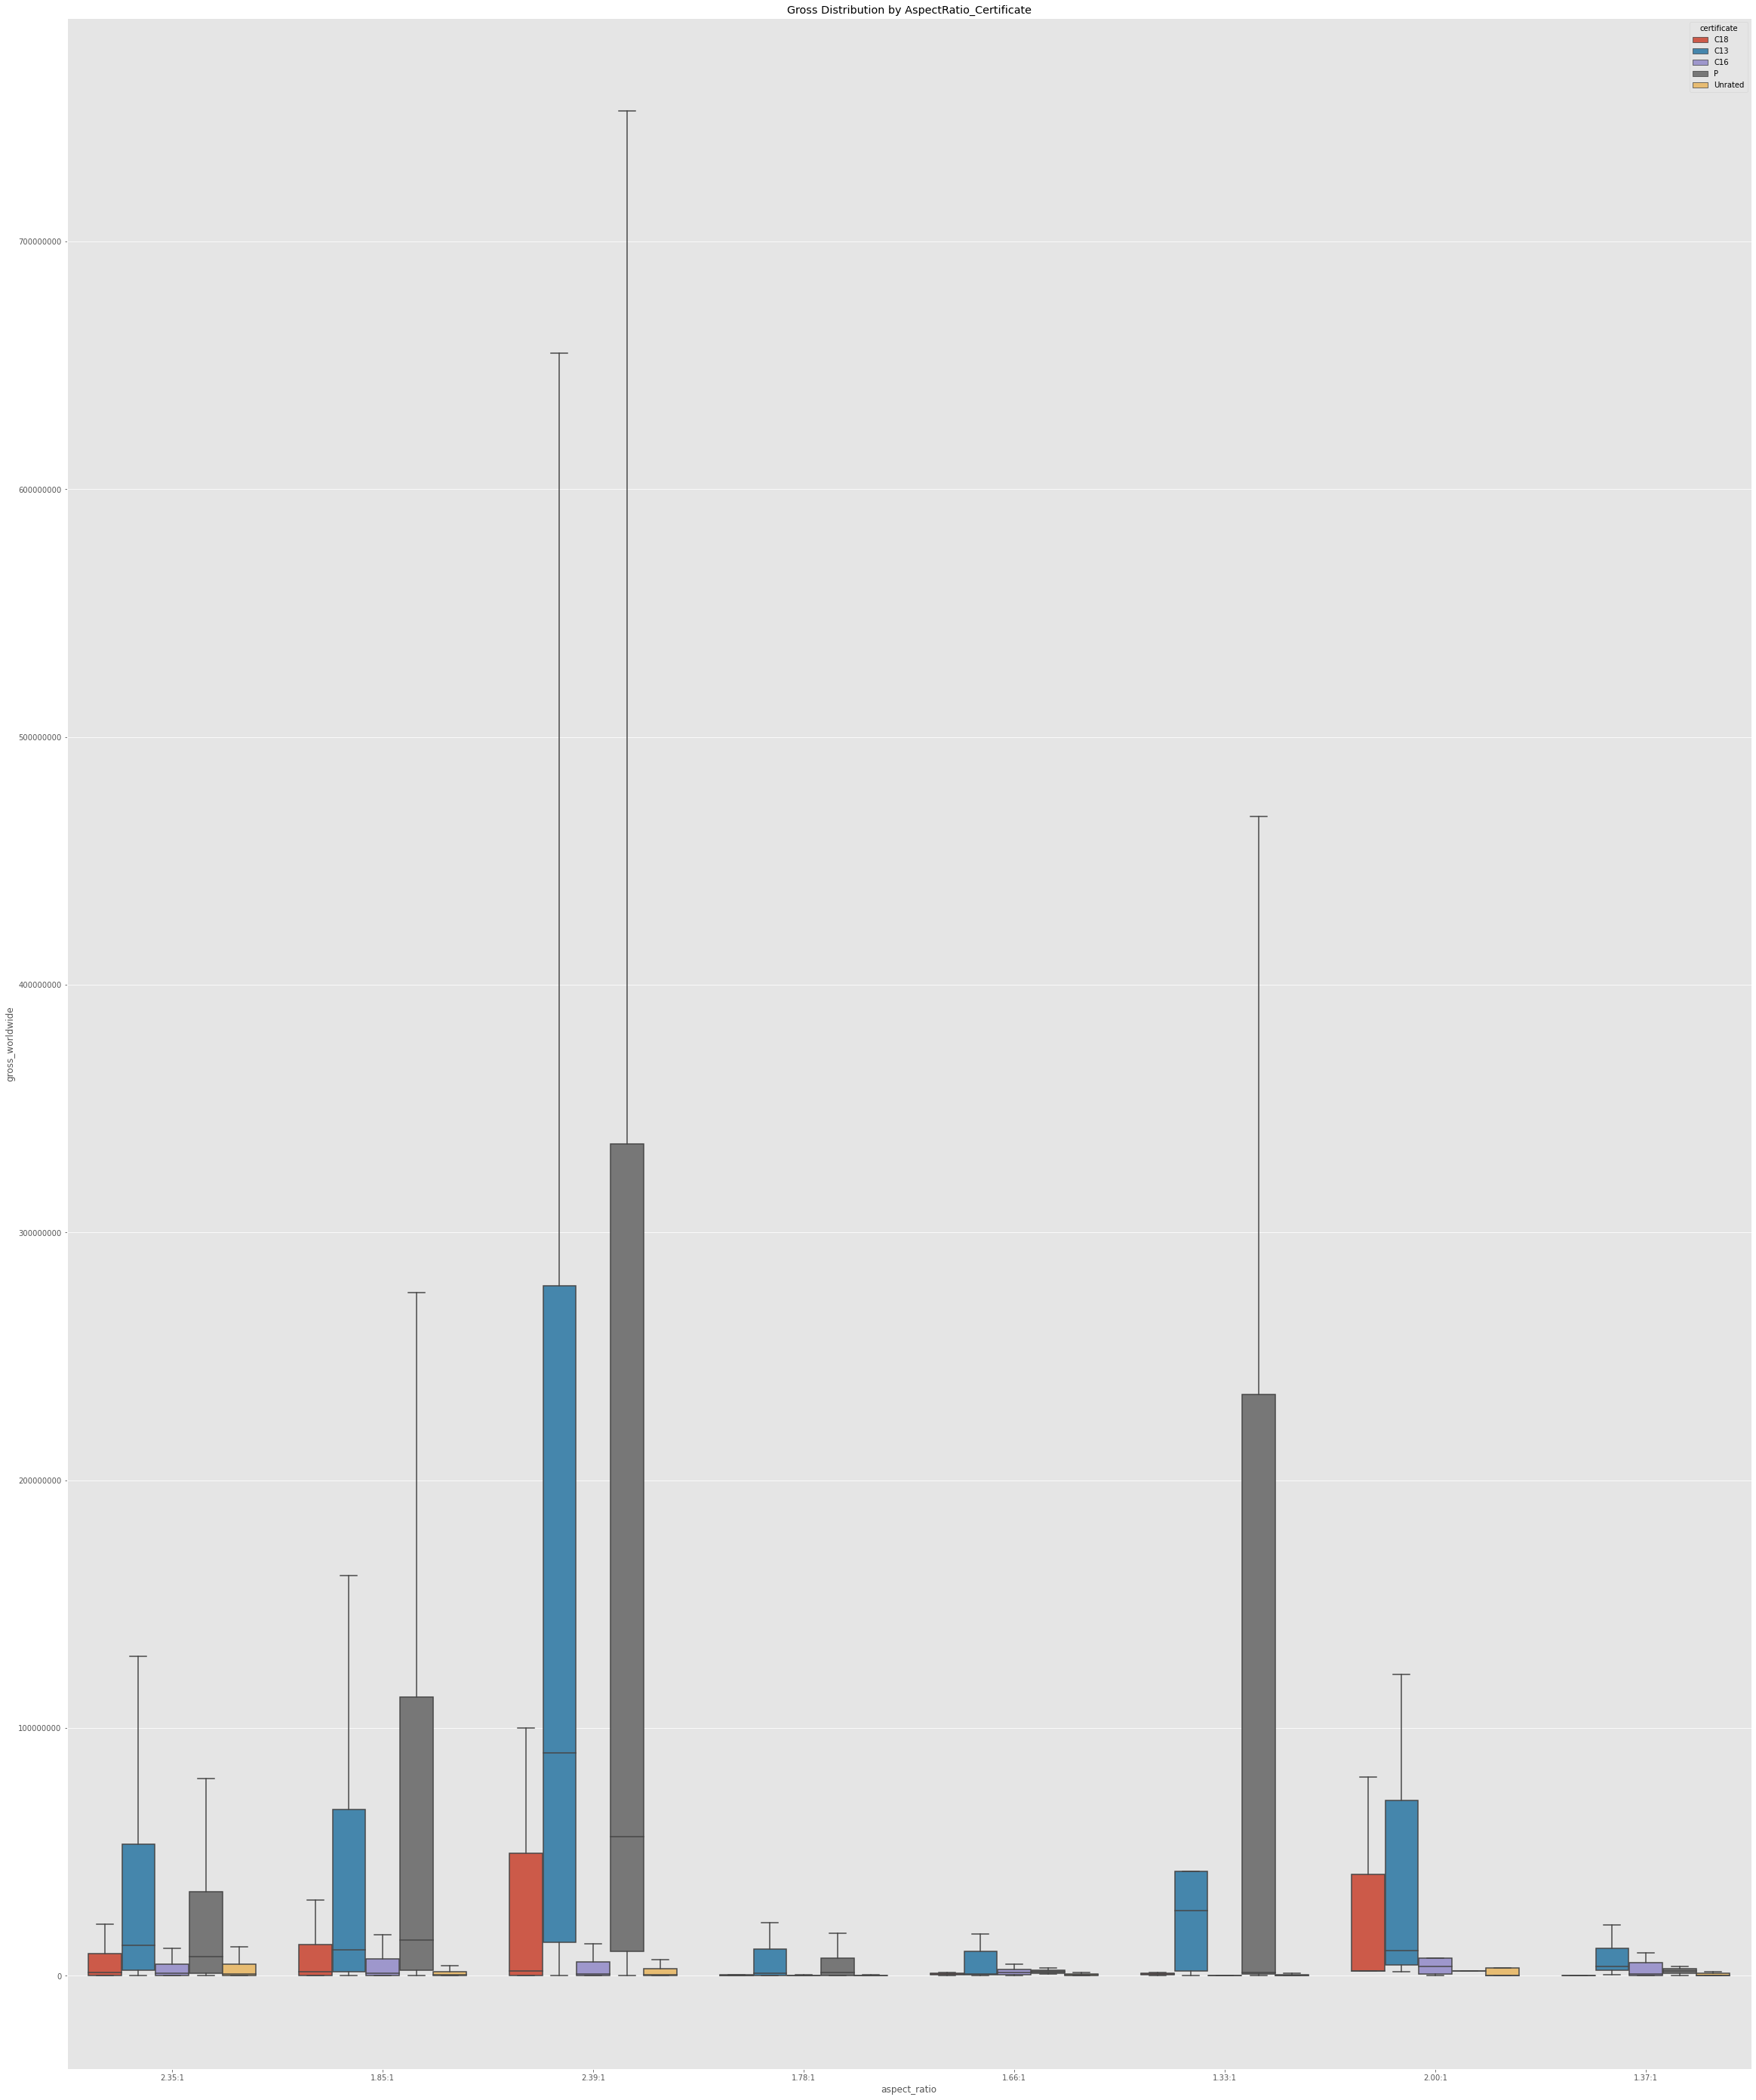

In [29]:
fig_dims = (40, 50)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y=df["gross_worldwide"], x=df["aspect_ratio"],showfliers=False,hue=df['certificate'], order=df.aspect_ratio.value_counts().index[0:8])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Gross Distribution by AspectRatio_Certificate')
plt.savefig('./graphs/da_bien/gross_by_certificate_aspectRatio_certificate' , bbox_inches='tight')
plt.show()

### Color-Release_date

# Data Driven

## Top những đạo diễn có doanh thu trung bình cao nhất

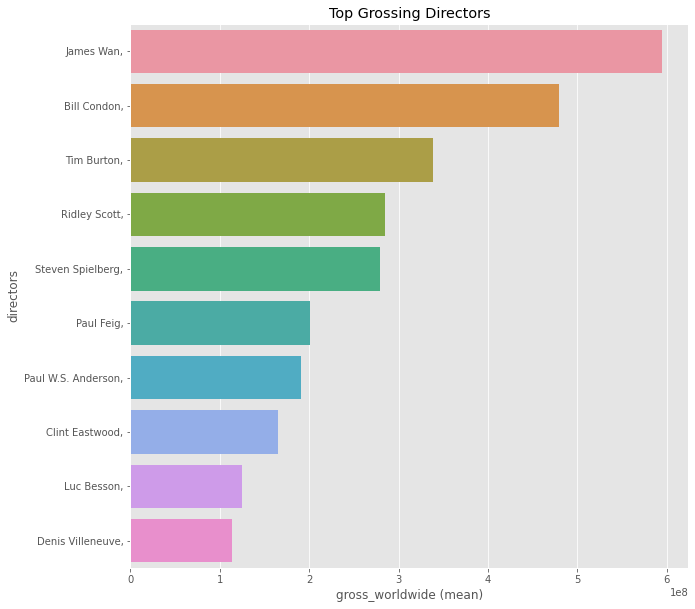

In [30]:
plt.figure(figsize=(10, 10))
vc = df.directors.value_counts()
listD = vc[vc.values > 5].index # chỉ lấy các đạo diễn có từ hơn 5 phim
top_gross = df[df.directors.isin(listD)].groupby('directors', as_index=False)['gross_worldwide'].mean()
top_gross_sorted = top_gross.sort_values('gross_worldwide', ascending=False)
sns.barplot(y='directors', x='gross_worldwide', data=top_gross_sorted.head(10))
plt.xlabel('gross_worldwide (mean)')
plt.title('Top Grossing Directors')
plt.savefig('./graphs/data_driven/top10_grossing_directors', bbox_inches='tight')
plt.show()

## Top những biên kịch có doanh thu trung bình cao nhất¶

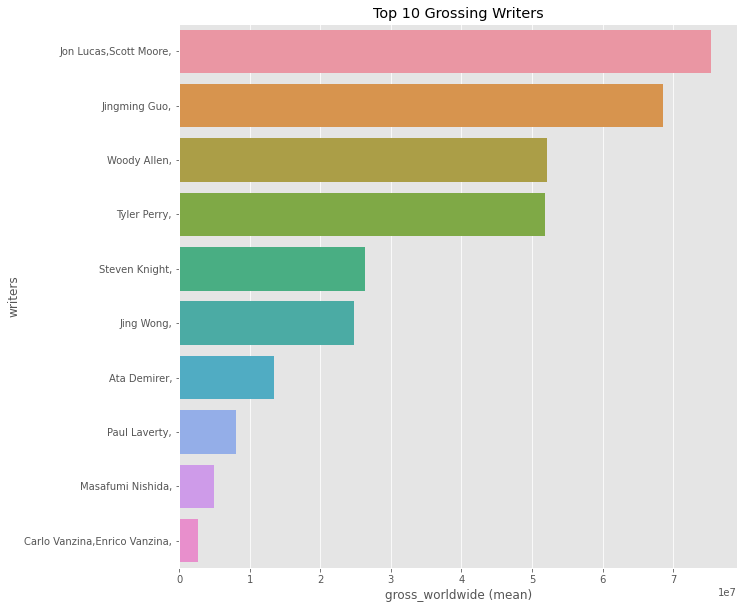

In [31]:
plt.figure(figsize=(10, 10))
vc = df.writers.value_counts()
listW = vc[vc.values > 5].index # chỉ lấy các biên kịch có từ hơn 5 phim
top_gross = df[df.writers.isin(listW)].groupby('writers', as_index=False)['gross_worldwide'].mean()
top_gross_sorted = top_gross.sort_values('gross_worldwide', ascending=False)
sns.barplot(y='writers', x='gross_worldwide', data=top_gross_sorted.head(10))
plt.xlabel('gross_worldwide (mean)')
plt.title('Top 10 Grossing Writers')
plt.savefig('./graphs/data_driven/top10_grossing_writers', bbox_inches='tight')
plt.show()

## Top những tổ hợp diễn viên có doanh thu trung bình cao nhất¶¶

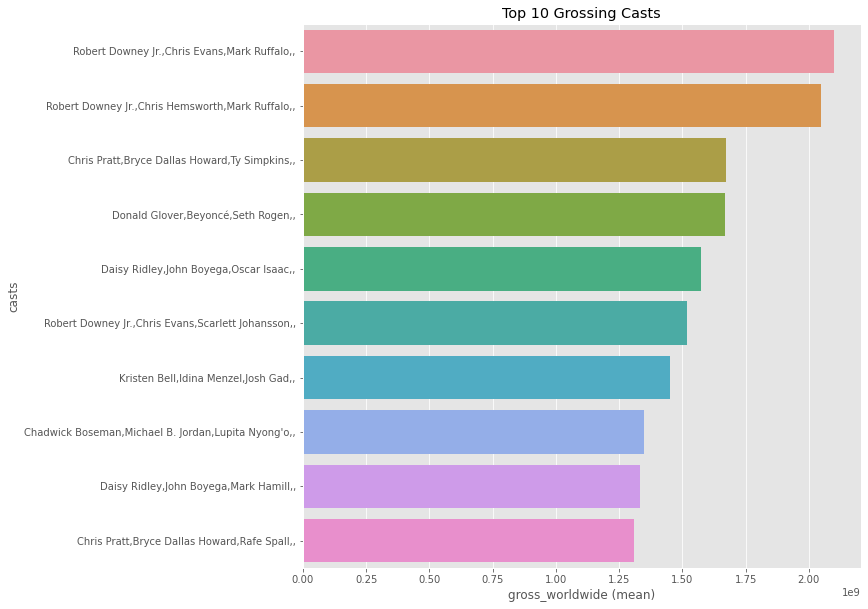

In [32]:
plt.figure(figsize=(10, 10))
vc = df.casts.value_counts()
listC = vc[vc.values > 0].index
top_gross = df[df.casts.isin(listC)].groupby('casts', as_index=False)['gross_worldwide'].mean()
top_gross_sorted = top_gross.sort_values('gross_worldwide', ascending=False)
sns.barplot(y='casts', x='gross_worldwide', data=top_gross_sorted.head(10))
plt.xlabel('gross_worldwide (mean)')
plt.title('Top 10 Grossing Casts')
plt.savefig('./graphs/data_driven/top10_grossing_casts', bbox_inches='tight')
plt.show()

 ## Top những tổ hợp thể loại có doanh thu trung bình cao nhất¶¶

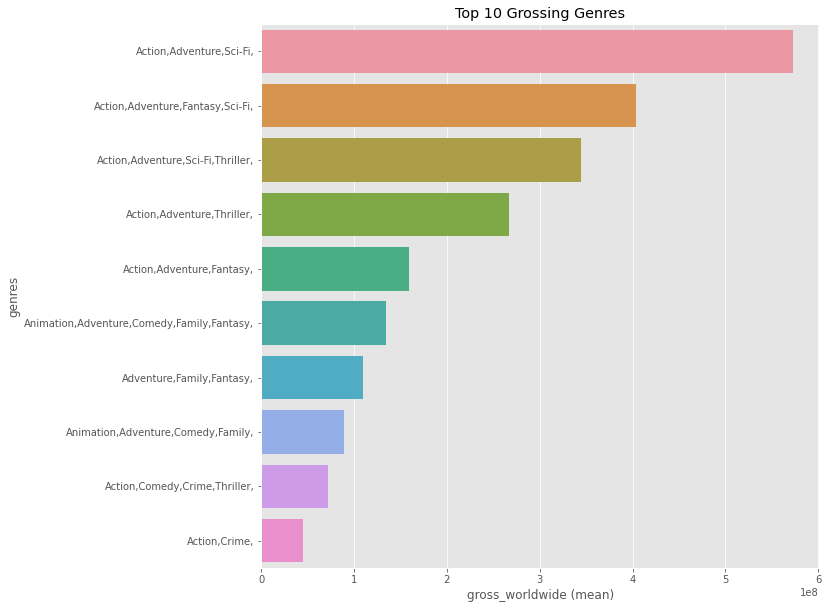

In [33]:
plt.figure(figsize=(10, 10))
vc = df.genres.value_counts()
listG = vc[vc.values > 20].index
top_gross = df[df.genres.isin(listG)].groupby('genres', as_index=False)['gross_worldwide'].mean()
top_gross_sorted = top_gross.sort_values('gross_worldwide', ascending=False)
sns.barplot(y='genres', x='gross_worldwide', data=top_gross_sorted.head(10))
plt.xlabel('gross_worldwide (mean)')
plt.title('Top 10 Grossing Genres')
plt.savefig('./graphs/data_driven/top10_grossing_genres', bbox_inches='tight')
plt.show()

## Top những tổ hợp âm thanh mang lại doanh thu trung bình cao nhất

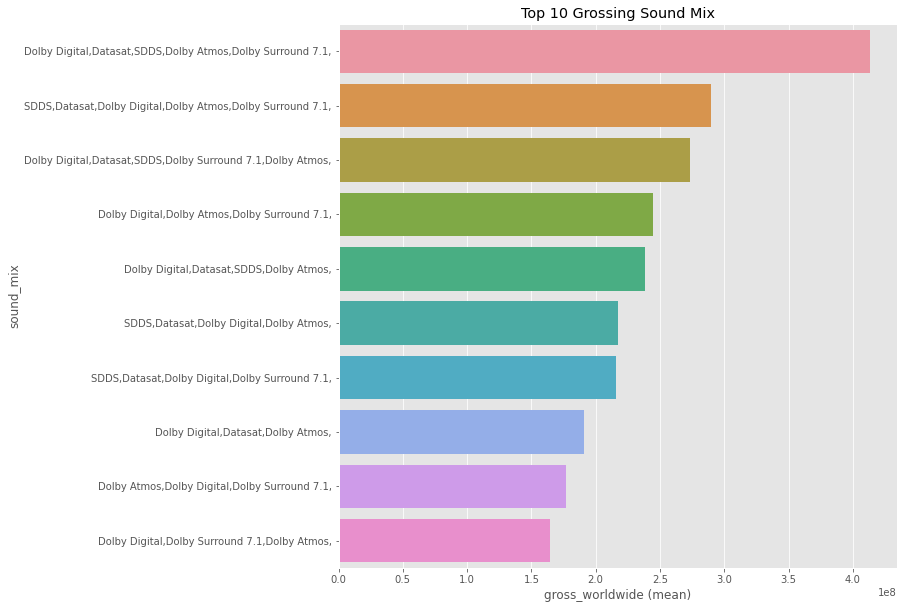

In [34]:
plt.figure(figsize=(10, 10))
vc = df.sound_mix.value_counts()
listS = vc[vc.values > 5].index
top_gross = df[df.sound_mix.isin(listS)].groupby('sound_mix', as_index=False)['gross_worldwide'].mean()
top_gross_sorted = top_gross.sort_values('gross_worldwide', ascending=False)
sns.barplot(y='sound_mix', x='gross_worldwide', data=top_gross_sorted.head(10))
plt.xlabel('gross_worldwide (mean)')
plt.title('Top 10 Grossing Sound Mix')
plt.savefig('./graphs/data_driven/top10_grossing_sound_mix', bbox_inches='tight')
plt.show()

## Có bao nhiêu thể loại phim độc lập? Số lượng mỗi loại?

In [35]:
genreList = getList('genres')
print(len(genreList), 'Gồm thể loại:')
for stt, genre in zip(range(0, len(genreList)), genreList):
    if stt+1 < 10:
        print(f"{stt+1}  {genre}")
    else:
        print(f"{stt+1} {genre}")

22 Gồm thể loại:
1  Sci-Fi
2  Drama
3  Adventure
4  Romance
5  Horror
6  Thriller
7  Animation
8  War
9  Fantasy
10 Crime
11 Sport
12 History
13 Mystery
14 Family
15 Western
16 Music
17 Comedy
18 Reality-TV
19 Musical
20 News
21 Action
22 Biography


In [36]:
dataG = []
for genre in genreList:
    for line in df[df.genres.str.contains(genre, na=False)].values:
        dataG.append((line[0], genre, line[10], line[6], line[16]))  
dataG = pd.DataFrame(data=dataG, columns=['title', 'genre', 'gross', 'year', 'score'])
temp = dataG.genre.value_counts()
print(temp)

Drama         11450
Comedy         7690
Thriller       3803
Romance        3487
Action         3078
Crime          2209
Adventure      1859
Horror         1804
Family         1656
Fantasy        1443
Mystery        1435
Animation      1159
Sci-Fi          981
Biography       875
History         839
Music           802
War             577
Sport           391
Musical         317
Western         122
News              2
Reality-TV        1
Name: genre, dtype: int64


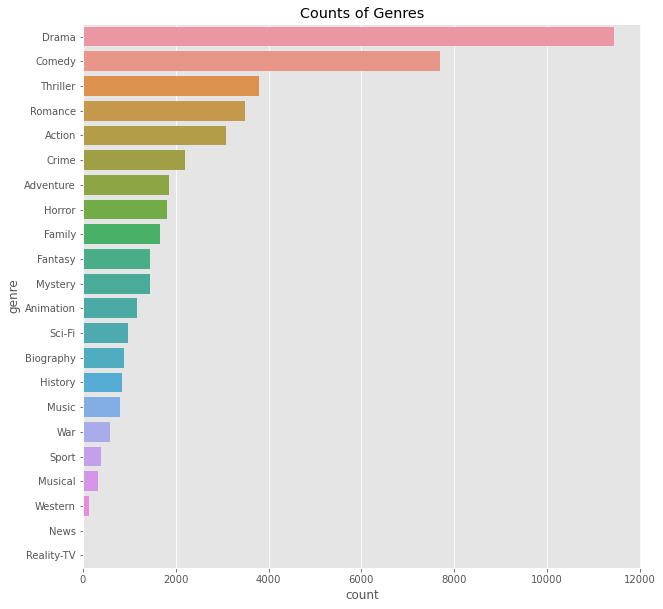

In [37]:
plt.figure(figsize=(10, 10))
sns.countplot(y="genre",data=dataG, order=dataG.genre.value_counts().index)
plt.title('Counts of Genres')
plt.savefig('./graphs/data_driven/genres_num', bbox_inches='tight')
plt.show()

## Mặc dù số lượng phim tăng lên, nhưng tổng doanh thu lại giảm. Điều này xảy ra là gì chất lượng phim đi xuống hay do nguyên nhân khác? (bản quyền, web lậu …)

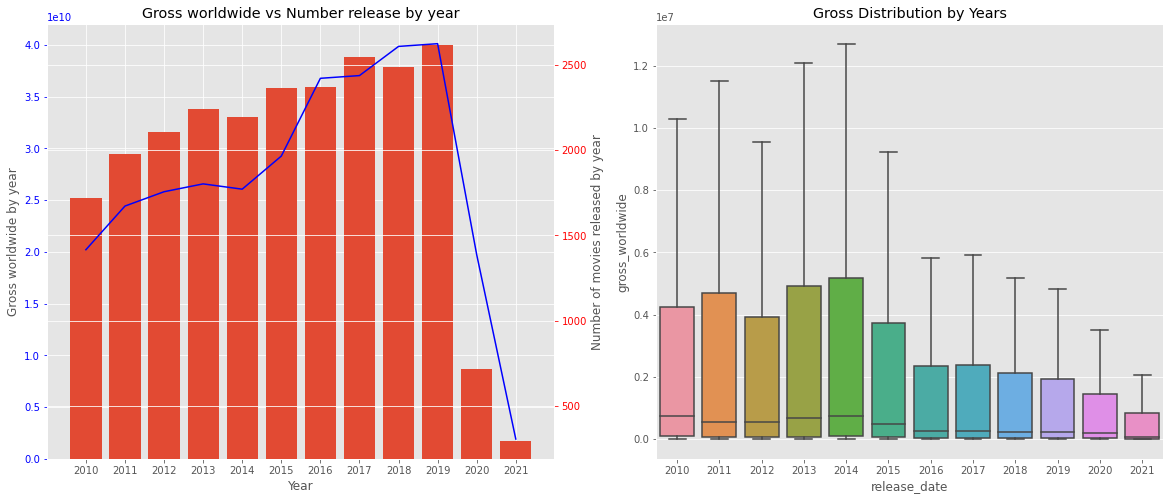

In [38]:
temp = df.groupby('release_date', as_index=False)['gross_worldwide'].sum()
temp['count'] = df.release_date.value_counts().sort_index().values 

fig, bar_ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8)) 
bar_ax[0].bar(temp['release_date'], temp['gross_worldwide'])  # plot first y series (line)
bar_ax[0].set_title('Gross worldwide vs Number release by year')
bar_ax[0].set_xlabel('Year')  # label for x axis
bar_ax[0].set_ylabel('Gross worldwide by year')  # label for left y axis
bar_ax[0].set_xticks(range(2010, 2022))
bar_ax[0].tick_params('y', colors='blue')  # add color to left y axis     

line_ax = bar_ax[0].twinx()
line_ax.plot(temp['release_date'], temp['count'], color='blue')  # plot second y series (bar)
line_ax.set_ylabel('Number of movies released by year')  # label for right y axis
line_ax.tick_params('y', colors='red')  # add color to right y axis

sns.boxplot(y=df["gross_worldwide"], x=df["release_date"],
            showfliers=False, order=[x for x in range(2010, 2022)], ax=bar_ax[1]).set_title('Gross Distribution by Years')

plt.savefig('./graphs/data_driven/gross_vs_num_by_years', bbox_inches='tight')
plt.show()

## Doanh thu và điểm đánh giá theo thể loại phim 

In [39]:
years = range(2010, 2021)
genres = df.genres.value_counts().index[0:10]

data = []

for year in years:
    for genre in genres:
        sum_gross = df[(df['release_date']==year) & (df['genres']==genre)]['gross_worldwide'].mean()
        avg_score = df[(df['release_date']==year) & (df['genres']==genre)]['score'].mean()
        data.append((year, genre, sum_gross, avg_score))

datadf = pd.DataFrame(data=data, columns=['year', 'genre', 'sum_gross', 'avg_score'])

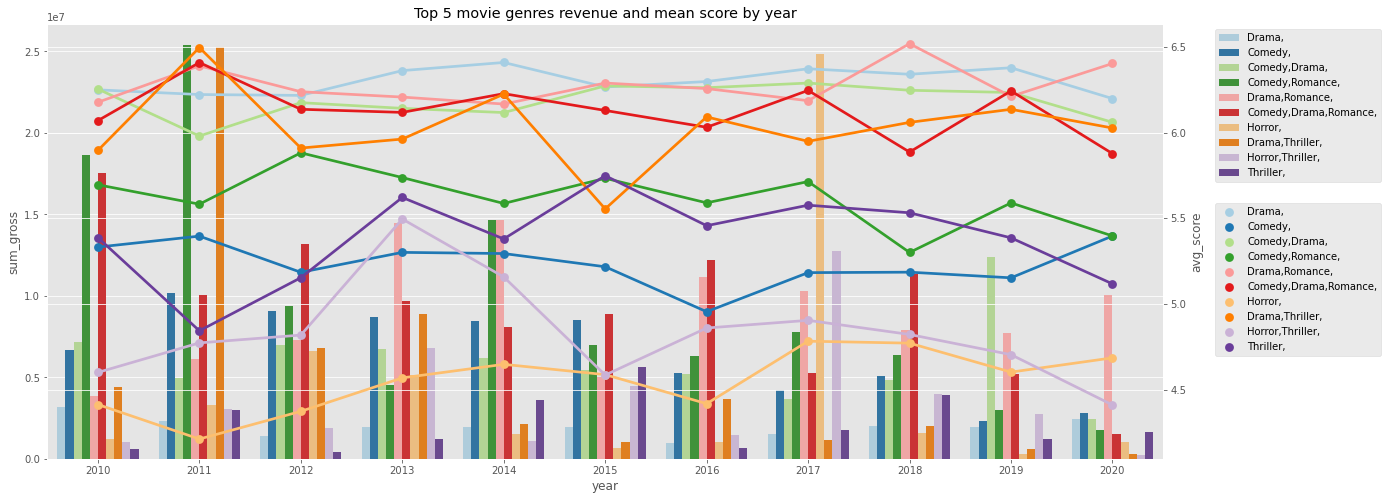

In [40]:
fig, bar_ax = plt.subplots(figsize=(20,8))
sns.barplot(x = "year",       # x variable name
            y = "sum_gross",       # y variable name
            hue = "genre",  # group variable name
            data = datadf,     # dataframe to plot
            order=range(2010, 2021),
            hue_order=df.genres.value_counts().index[0:10],
            dodge=True, 
            ci=None,
            palette='Paired')
point_ax = bar_ax.twinx()
sns.pointplot(x = "year",       # x variable name
            y = "avg_score",  
            order=range(2010, 2021),
            hue_order=df.genres.value_counts().index[0:10],# y variable name
            hue = "genre", # group variable name
            data = datadf,     # dataframe to plot 
            ci=None, palette='Paired')
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10) 
point_ax.legend(loc='upper right', bbox_to_anchor=(1.2, 0.6))
bar_ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Top 5 movie genres revenue and mean score by year')
plt.savefig('./graphs/data_driven/top_5_movie_genres_revenue_and_mean_score_by_year', bbox_inches='tight')
plt.show()

## Một vài phim Việt có doanh thu cao

In [59]:
df[df.countries_of_origin.str.contains('Vietnam', na=False)][['title', 'directors', 'genres', 'release_date', 'gross_worldwide']].sort_values('gross_worldwide', ascending=False).head(10)

,title,directors,genres,release_date,gross_worldwide
20955,Mắt Biếc,"Victor Vu,","Drama,Romance,",2019.0,7061163.0
17663,Tiệc Trăng Máu,"Quang Dung Nguyen,","Comedy,Drama,",2020.0,6709383.0
1156,Gai Gia Lam Chieu 3,"Namcito,","Comedy,",2020.0,5830719.0
10200,Hai Phuong,"Le-Van Kiet,","Action,Drama,Thriller,",2019.0,5756185.0
6960,Cua Lại Vợ Bầu,"Nhat Trung,","Comedy,Family,Romance,",2019.0,5564332.0
2568,Chi Muoi Ba 2: 3 Ngay Sinh Tu,"Vo Thanh Hoa,","Action,Comedy,",2020.0,4257126.0
1983,Em La Ba Noi Cua Anh,"Phan Gia Nhat Linh,","Comedy,Music,",2015.0,3810429.0
19017,Tôi Thấy Hoa Vàng Trên Cỏ Xanh,"Victor Vu,","Drama,",2015.0,3293667.0
16354,Chi Chi Em Em,"Kathy Uyen,","Drama,Thriller,",2019.0,2978284.0
7523,49 Ngày,"Nhat Trung,","Comedy,Drama,Romance,",2015.0,2904527.0


## Ngoài tiếng anh ra, anh hưởng của ngôn ngữ khác tới doanh thu phim là như thế nào?

Hầu hết phim ra rạp đều có ngôn ngữ là tiếng Anh nên doanh thu của những phim tiếng Anh sẽ là lớn nhất.
Vậy bên cạnh tiếng Anh liệu có ngôn ngữ phim nào được đón nhận hay không?

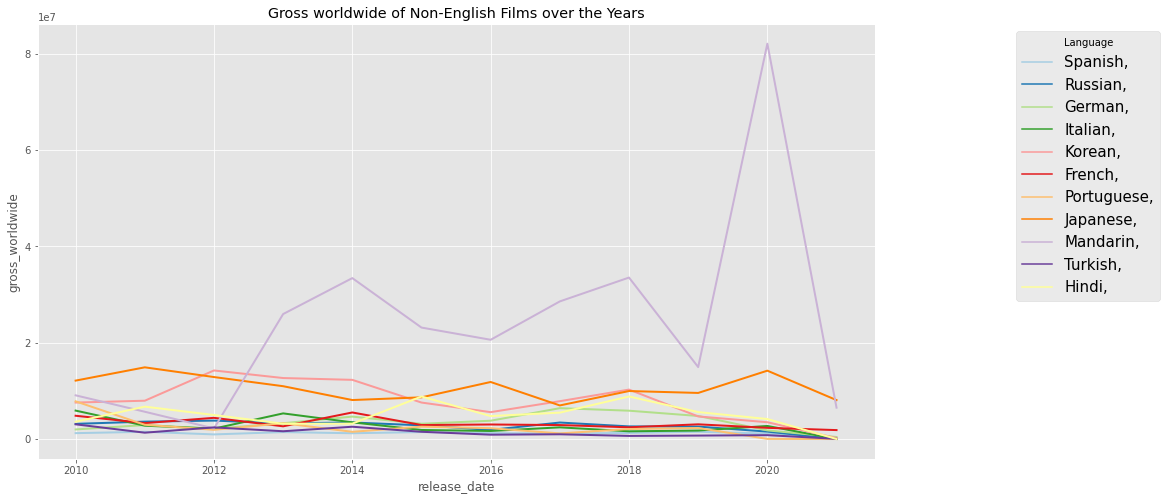

In [61]:
non_eng_movies=df[df["languages"].str.contains("English")==False]
non_eng=non_eng_movies.groupby('languages').filter(lambda x : len(x)>300).sort_values(by="release_date")

non_eng_graph=sns.lineplot(data=non_eng, x=non_eng["release_date"], y=non_eng['gross_worldwide'], hue=non_eng["languages"], ci=None,linewidth = 2, palette='Paired')
non_eng_graph.legend(loc='upper right', bbox_to_anchor=(1.35, 1), prop={'size': 15}, title="Language")
non_eng_graph.set(title="Gross worldwide of Non-English Films over the Years")

fig = plt.gcf()
fig.set_size_inches(15, 8)

Phim có ngôn ngữ là tiếng Mandarin có doanh thu vượt trội so với những ngôn ngữ có 200 phim trở lên trong dataset. Lí giải cho điều này bởi Mandarin là tiếng phổ thông của Trung Quốc (hơn 900 triệu người sử dụng), việc có thêm ngôn ngữ này vào phim sẽ thu hút thêm người xem ở thị trường tỷ dân này.
Phim có ngôn ngữ là tiếng Nhật có doanh thu cũng vượt trội theo sau. Lí giải cho điều nay có thể là do sự phát triển lớn mạnh của phim hoạt hình Nhật Bản (gần như bành trướng trong dòng phim hoạt hình).

## Thể loại phim nào nhận được sự đánh giá cao từ khán giả?
Ở phần EDA cơ bản ta đã chỉ ra rằng có 1552 tổ hợp thể loại phim trong dataset. Có những thể loại chỉ có 1-2 phim nên để rút ngắn công việc, ta chỉ xét đến những tổ hợp thể loại với số lượng phim trên 300 phim.

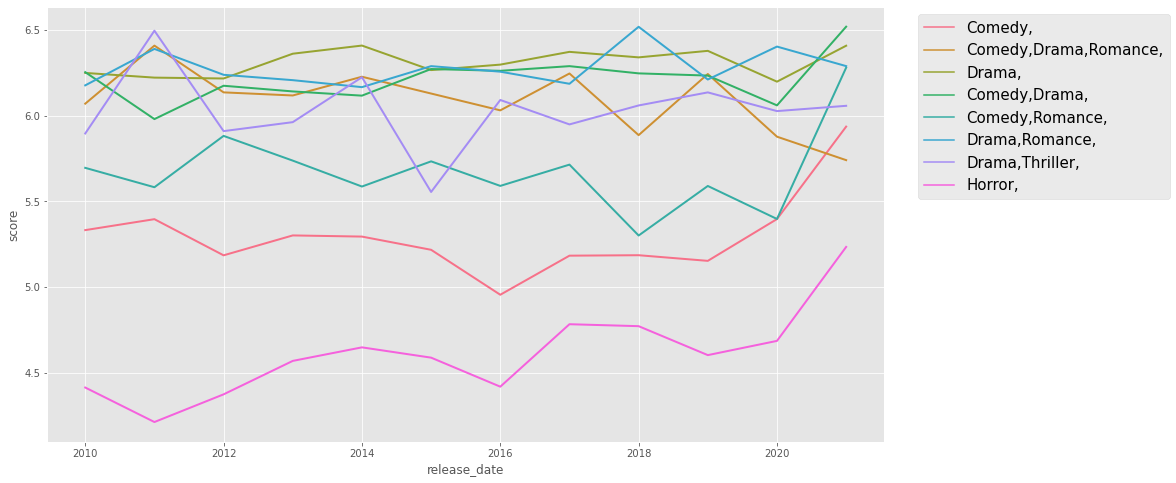

In [62]:
genre_filter = df.groupby('genres').filter(lambda x : len(x)>300).sort_values(by="release_date")
g = sns.lineplot(data=genre_filter, x=genre_filter["release_date"], y=genre_filter['score'], hue=genre_filter["genres"], ci=None,linewidth = 2)
g.legend(loc='upper right', bbox_to_anchor=(1.35, 1), prop={'size': 15})
fig = plt.gcf()
fig.set_size_inches(15, 8)

Top những thể loại phim được đánh giá cao từ khán giả là Drama,Romance - Drama, Comedy - Drama